<a href="https://colab.research.google.com/github/vivan-doshi/uber-data/blob/main/02_Uber_Pickups_NYC_Regressions_for_Explanatory_and_Causal_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\rule{800pt}{20pt}$

# Imports

In [ ]:
! pip install stargazer

In [ ]:
import os
import time
from datetime import datetime


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.use('ggplot')

import sklearn

import statsmodels.api as sm

import tensorflow as tf
# tf.keras.utils.set_random_seed(42)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.getcwd()

'/content'

In [ ]:
images_path = '/content/drive/My Drive/DSO_545_Fall_2024/Images'

data_path = '/content/drive/MyDrive/DSO_545_Fall_2024/11_Uber_Pickups_Algorithmic_EDA_and_Explanatory_Regressions_I/Data'

In [ ]:
# tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'image.png'))

$\rule{800pt}{20pt}$

# Analytics to Understand, Monitor, and Improve Uber's Business Model
<br>
<font size="+1">
    <ul>
        <font color="blue"><li><b>We also want to make recommendations on how Uber can increase their market share in taxi-crowded markets, such as New York City.</b></li></font>
        <br>
        <ul>
          <font color="blue"><li>Part of the process of making recommendations is to create a data-driven system that can monitor the impact of taxi demand given the supply of Uber rides.</li></font>
          <br>
        </ul>
        <li>To do this, we to do the following analyses:</li>
        <br>
        <ul>
            <li><b>EDA:</b></li>
            <br>
            <ul>
                <li>Use the data to identify rider and driver patterns.</li>
                <br>
            </ul>
            <li><b>Algorithmic EDA - Clustering Analysis:</b></li>
            <br>
            <ul>
                <li>Identifying high-demand areas aligns with Uber's goal to optimize driver allocation.</li>
                <br>
                <li>Helps in strategic planning for market penetration and service improvement.</li>
                <br>
            </ul>
            <li><b>Regression Analysis for Explanatory and Causal Inference:</b></li>
            <br>
            <ul>
                <li>Estimate the sensitivity of taxi demand to the number of Uber ride offerings.</li>
                <br>
                <li>Helps analyze market penetration and inform strategic platform decisions.</li>
                <br>
            </ul>
        </ul>
    </ul>
</font>
<br>

$\rule{800pt}{20pt}$

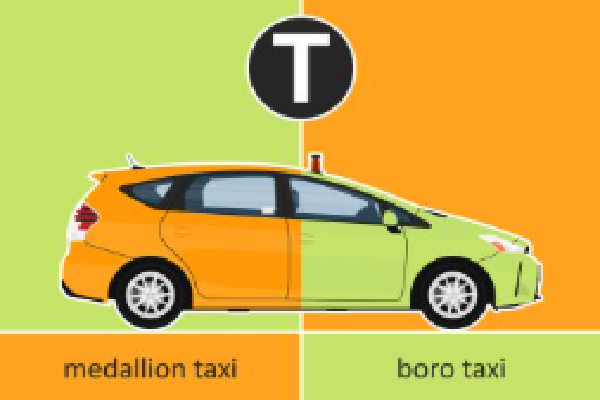

In [ ]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'green_vs_yellow_taxis.png'), target_size=(400,600))

In [ ]:
def add_date_features(df, datetime_column):
    # Ensure the datetime_column is in datetime format
    df[datetime_column] = pd.to_datetime(df[datetime_column])

    # Add date features
    df['Date'] = df[datetime_column].dt.date
    df['Month'] = df[datetime_column].dt.month
    df['Week'] = df[datetime_column].dt.isocalendar().week
    df['DayOfMonthNum'] = df[datetime_column].dt.day
    df['DayOfWeekNum'] = df[datetime_column].dt.dayofweek
    df['DayOfWeek'] = df[datetime_column].dt.day_name()
    df['Hour'] = df[datetime_column].dt.hour

    return df

# NYC Taxi Rides Data

- <a href="https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page">NYC Taxi & Limousine Commission (TLC) Trip Record Data</a>

---
---

- Yellow taxis

  - Can pick up passengers anywhere in the five boroughs of New York City.
  
  - They are also known as medallion taxis.

- Green taxis

  - Also known as "boro taxis", these taxis can pick up passengers in the outer boroughs and in Manhattan above East 96th and West 110th Streets.
  
  - They cannot pick up passengers below East 96th Street and West 110th Street in Manhattan, or at LaGuardia or John F. Kennedy International Airports.


---
---

In [ ]:
os.listdir(data_path)

['Aggregate_Statistics',
 'Non_Uber_For_Hire_Vehicles_(FHV)_Trips',
 'Uber_Trip_Data_2015',
 'Uber_Trip_Data_2014',
 'food-health.csv',
 'NYC_TLC_Cab_Trip_Records',
 'Weather_Data_in_NYC',
 'uber_2014_trip_data_clustering.csv',
 'location_ID_to_latitude_longitude.csv',
 'Metadata_and_Data_Dictionaries',
 'taxi_zone_lookup.csv',
 'demand_elasticity_data_NYC_June_2015.csv']

In [ ]:
sorted(os.listdir(os.path.join(data_path, 'NYC_TLC_Cab_Trip_Records')))

['fhv_tripdata_2015-01.parquet',
 'fhv_tripdata_2015-02.parquet',
 'fhv_tripdata_2015-03.parquet',
 'fhv_tripdata_2015-04.parquet',
 'fhv_tripdata_2015-05.parquet',
 'fhv_tripdata_2015-06.parquet',
 'green_tripdata_2014-01.parquet',
 'green_tripdata_2014-04.parquet',
 'green_tripdata_2014-05.parquet',
 'green_tripdata_2014-06.parquet',
 'green_tripdata_2014-07.parquet',
 'green_tripdata_2014-08.parquet',
 'green_tripdata_2014-09.parquet',
 'green_tripdata_2015-01.parquet',
 'green_tripdata_2015-02.parquet',
 'green_tripdata_2015-03.parquet',
 'green_tripdata_2015-04.parquet',
 'green_tripdata_2015-05.parquet',
 'green_tripdata_2015-06.parquet',
 'yellow_tripdata_2014-04.parquet',
 'yellow_tripdata_2014-05.parquet',
 'yellow_tripdata_2014-06.parquet',
 'yellow_tripdata_2014-07.parquet',
 'yellow_tripdata_2014-08.parquet',
 'yellow_tripdata_2014-09.parquet',
 'yellow_tripdata_2015-01.parquet',
 'yellow_tripdata_2015-02.parquet',
 'yellow_tripdata_2015-03.parquet',
 'yellow_tripdata_2015-

## Green Taxi Data

---
---

- <b>Green Taxi Data Dictionary</b>

| Field Name            | Description                                                                                                                                          |
|-----------------------|------------------------------------------------------------------------------------------------------------------------------------------------------|
| **VendorID**          | A code indicating the LPEP provider that provided the record.                                                                                       |
|                       | 1 = Creative Mobile Technologies, LLC; 2 = VeriFone Inc.                                                                                            |
| **lpep_pickup_datetime**  | The date and time when the meter was engaged.                                                                                                        |
| **lpep_dropoff_datetime** | The date and time when the meter was disengaged.                                                                                                    |
| **Passenger_count**   | The number of passengers in the vehicle. This is a driver-entered value.                                                                             |
| **Trip_distance**     | The elapsed trip distance in miles reported by the taximeter.                                                                                       |
| **PULocationID**      | TLC Taxi Zone in which the taximeter was engaged.                                                                                                   |
| **DOLocationID**      | TLC Taxi Zone in which the taximeter was disengaged.                                                                                                |
| **RateCodeID**        | The final rate code in effect at the end of the trip.                                                                                               |
|                       | 1 = Standard rate                                                                                                                                    |
|                       | 2 = JFK                                                                                                                                              |
|                       | 3 = Newark                                                                                                                                           |
|                       | 4 = Nassau or Westchester                                                                                                                            |
|                       | 5 = Negotiated fare                                                                                                                                  |
|                       | 6 = Group ride                                                                                                                                       |
| **Store_and_fwd_flag**| This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward.”                         |
|                       | Y = store and forward trip                                                                                                                           |
|                       | N = not a store and forward trip                                                                                                                     |
| **Payment_type**      | A numeric code signifying how the passenger paid for the trip.                                                                                      |
|                       | 1 = Credit card                                                                                                                                      |
|                       | 2 = Cash                                                                                                                                             |
|                       | 3 = No charge                                                                                                                                        |
|                       | 4 = Dispute                                                                                                                                          |
|                       | 5 = Unknown                                                                                                                                          |
|                       | 6 = Voided trip                                                                                                                                      |
| **Fare_amount**       | The time-and-distance fare calculated by the meter.                                                                                                 |
| **Extra**             | Miscellaneous extras and surcharges. Currently, this only includes the \$0.50 and \$1 rush hour and overnight charges.                                 |
| **MTA_tax**           | \$0.50 MTA tax that is automatically triggered based on the metered rate in use.                                                                     |
| **Improvement_surcharge** | \$0.30 improvement surcharge assessed on hailed trips at the flag drop. The improvement surcharge began being levied in 2015.                     |
| **Tip_amount**        | Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.                                                |
| **Tolls_amount**      | Total amount of all tolls paid in trip.                                                                                                             |
| **Total_amount**      | The total amount charged to passengers. Does not include cash tips.                                                                                 |
| **Trip_type**         | A code indicating whether the trip was a street-hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver. |
|                       | 1 = Street-hail                                                                                                                                      |
|                       | 2 = Dispatch                                                                                                                                         |


---
---

In [ ]:
green_cab_trip_files = sorted(os.listdir(os.path.join(data_path, 'NYC_TLC_Cab_Trip_Records')))[7:19]

green_cab_trip_files

['green_tripdata_2014-04.parquet',
 'green_tripdata_2014-05.parquet',
 'green_tripdata_2014-06.parquet',
 'green_tripdata_2014-07.parquet',
 'green_tripdata_2014-08.parquet',
 'green_tripdata_2014-09.parquet',
 'green_tripdata_2015-01.parquet',
 'green_tripdata_2015-02.parquet',
 'green_tripdata_2015-03.parquet',
 'green_tripdata_2015-04.parquet',
 'green_tripdata_2015-05.parquet',
 'green_tripdata_2015-06.parquet']

In [ ]:
# June 2014 & 2015 Pickup data

# green_cab_June_2014 = pd.read_parquet(os.path.join(data_path,
#                                                    'NYC_TLC_Cab_Trip_Records',
#                                                    'green_tripdata_2014-06.parquet'))

green_cab_June_2015 = pd.read_parquet(os.path.join(data_path,
                                                   'NYC_TLC_Cab_Trip_Records',
                                                   'green_tripdata_2015-06.parquet'))

green_cab_June_2015 = add_date_features(green_cab_June_2015, 'lpep_pickup_datetime')

green_cab_June_2015

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,payment_type,trip_type,congestion_surcharge,Date,Month,Week,DayOfMonthNum,DayOfWeekNum,DayOfWeek,Hour
0,2,2015-06-01 00:18:37,2015-06-01 00:37:36,N,1,97,112,1,5.50,20.0,...,1,1.0,None,2015-06-01,6,23,1,0,Monday,0
1,2,2015-06-01 00:19:26,2015-06-01 00:21:32,N,1,80,80,1,0.35,3.5,...,1,1.0,None,2015-06-01,6,23,1,0,Monday,0
2,2,2015-06-01 00:26:41,2015-06-01 00:42:13,N,1,80,90,1,4.42,16.0,...,1,1.0,None,2015-06-01,6,23,1,0,Monday,0
3,2,2015-06-01 00:13:36,2015-06-01 00:22:42,N,1,225,97,1,2.20,9.5,...,1,1.0,None,2015-06-01,6,23,1,0,Monday,0
4,2,2015-06-01 00:24:47,2015-06-01 00:46:14,N,1,97,63,1,4.81,18.0,...,2,1.0,None,2015-06-01,6,23,1,0,Monday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638863,2,2015-06-30 23:41:57,2015-07-01 00:04:37,N,1,223,164,1,5.37,20.5,...,1,1.0,None,2015-06-30,6,27,30,1,Tuesday,23
1638864,2,2015-06-30 23:28:05,2015-06-30 23:40:49,N,1,97,112,1,3.62,12.5,...,1,1.0,None,2015-06-30,6,27,30,1,Tuesday,23
1638865,2,2015-06-30 23:20:05,2015-06-30 23:27:22,N,1,25,52,1,1.11,7.0,...,2,1.0,None,2015-06-30,6,27,30,1,Tuesday,23
1638866,2,2015-06-30 23:29:13,2015-06-30 23:39:40,N,1,40,106,1,1.75,9.0,...,1,1.0,None,2015-06-30,6,27,30,1,Tuesday,23


In [ ]:
# locationID_lat_long = pd.read_csv(os.path.join(data_path, 'location_ID_to_latitude_longitude.csv'))
# locationID_lat_long.rename(columns={'X':'Lon', 'Y':'Lat', 'location_i':'locationID'}, inplace=True)

# locationID_lat_long

In [ ]:
# green_cab_June_2014 = green_cab_June_2014.merge(locationID_lat_long, left_on=['PULocationID'], right_on=['locationID'], how='outer')

---
---

- **LPEP** stands for **Livery Passenger Enhancement Program**. It is a system used in New York City's taxi and for-hire vehicle industry to monitor and improve services provided by livery vehicles, specifically **Green Taxis** or **Boro Taxis**.

- Key Points About LPEP:


  1. **Purpose**:
    - Introduced to enhance the service quality of Green Taxis, which are allowed to pick up passengers in outer boroughs (Brooklyn, Queens, Bronx, Staten Island) and above 110th Street in Manhattan.
    - Collects trip data for monitoring purposes, similar to the TPEP (Taxi Passenger Enhancement Program) system used for Yellow Taxis.

  2. **Functions**:
    - **Trip Data Collection**: Records trip information, including pickup and drop-off locations, times, fares, and other related data.
    - **Payment Processing**: Supports various payment methods, including credit cards and cash.
    - **Driver Monitoring**: Tracks metrics like passenger counts and service efficiency.

  3. **Difference from TPEP**:
    - **TPEP** is for Yellow Taxis.
    - **LPEP** is for Green Taxis (Boro Taxis) which operate in areas with historically lower Yellow Taxi service coverage.

- This program helps the NYC Taxi and Limousine Commission (TLC) ensure regulatory compliance, improve passenger experience, and analyze transportation trends in less-served areas.

---
---

## Yellow Taxi Data

---
---

- <b>Yellow Taxi Data Dictionary</b>

| Field Name              | Description                                                                                                                                       |
|-------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| **VendorID**            | A code indicating the TPEP provider that provided the record.                                                                                     |
|                         | 1 = Creative Mobile Technologies, LLC; 2 = VeriFone Inc.                                                                                          |
| **tpep_pickup_datetime**| The date and time when the meter was engaged.                                                                                                     |
| **tpep_dropoff_datetime**| The date and time when the meter was disengaged.                                                                                                 |
| **Passenger_count**     | The number of passengers in the vehicle. This is a driver-entered value.                                                                          |
| **Trip_distance**       | The elapsed trip distance in miles reported by the taximeter.                                                                                     |
| **PULocationID**        | TLC Taxi Zone in which the taximeter was engaged.                                                                                                 |
| **DOLocationID**        | TLC Taxi Zone in which the taximeter was disengaged.                                                                                              |
| **RateCodeID**          | The final rate code in effect at the end of the trip.                                                                                             |
|                         | 1 = Standard rate                                                                                                                                |
|                         | 2 = JFK                                                                                                                                           |
|                         | 3 = Newark                                                                                                                                        |
|                         | 4 = Nassau or Westchester                                                                                                                         |
|                         | 5 = Negotiated fare                                                                                                                               |
|                         | 6 = Group ride                                                                                                                                   |
| **Store_and_fwd_flag**  | This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward.”                      |
|                         | Y = store and forward trip                                                                                                                        |
|                         | N = not a store and forward trip                                                                                                                  |
| **Payment_type**        | A numeric code signifying how the passenger paid for the trip.                                                                                    |
|                         | 1 = Credit card                                                                                                                                   |
|                         | 2 = Cash                                                                                                                                          |
|                         | 3 = No charge                                                                                                                                    |
|                         | 4 = Dispute                                                                                                                                       |
|                         | 5 = Unknown                                                                                                                                       |
|                         | 6 = Voided trip                                                                                                                                   |
| **Fare_amount**         | The time-and-distance fare calculated by the meter.                                                                                               |
| **Extra**               | Miscellaneous extras and surcharges. Currently, this only includes the \$0.50 and \$1 rush hour and overnight charges.                               |
| **MTA_tax**             | \$0.50 MTA tax that is automatically triggered based on the metered rate in use.                                                                   |
| **Improvement_surcharge** | \$0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.                              |
| **Tip_amount**          | Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.                                               |
| **Tolls_amount**        | Total amount of all tolls paid in trip.                                                                                                           |
| **Total_amount**        | The total amount charged to passengers. Does not include cash tips.                                                                               |
| **Congestion_Surcharge**| Total amount collected in trip for NYS congestion surcharge.                                                                                      |
| **Airport_fee**         | \$1.25 for pick up only at LaGuardia and John F. Kennedy Airports.                                                                                 |

---
---

In [ ]:
yellow_cab_trip_files = sorted(os.listdir(os.path.join(data_path, 'NYC_TLC_Cab_Trip_Records')))[18:]

yellow_cab_trip_files

['green_tripdata_2015-06.parquet',
 'yellow_tripdata_2014-04.parquet',
 'yellow_tripdata_2014-05.parquet',
 'yellow_tripdata_2014-06.parquet',
 'yellow_tripdata_2014-07.parquet',
 'yellow_tripdata_2014-08.parquet',
 'yellow_tripdata_2014-09.parquet',
 'yellow_tripdata_2015-01.parquet',
 'yellow_tripdata_2015-02.parquet',
 'yellow_tripdata_2015-03.parquet',
 'yellow_tripdata_2015-04.parquet',
 'yellow_tripdata_2015-05.parquet',
 'yellow_tripdata_2015-06.parquet']

In [ ]:
# June 2014 & 2015 Pickup data

# yellow_cab_June_2014 = pd.read_parquet(os.path.join(data_path,
#                                                       'NYC_TLC_Cab_Trip_Records',
#                                                       'yellow_tripdata_2014-06.parquet'))

yellow_cab_June_2015 = pd.read_parquet(os.path.join(data_path,
                                                    'NYC_TLC_Cab_Trip_Records',
                                                    'yellow_tripdata_2015-06.parquet'))

yellow_cab_June_2015 = add_date_features(yellow_cab_June_2015, 'tpep_pickup_datetime')

yellow_cab_June_2015

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,airport_fee,Date,Month,Week,DayOfMonthNum,DayOfWeekNum,DayOfWeek,Hour
0,1,2015-06-01 00:04:04,2015-06-01 00:13:02,1,1.10,1,N,79,148,3,...,8.80,None,None,2015-06-01,6,23,1,0,Monday,0
1,1,2015-06-01 00:42:13,2015-06-01 00:52:37,1,3.40,1,N,87,68,1,...,14.80,None,None,2015-06-01,6,23,1,0,Monday,0
2,1,2015-06-01 00:24:29,2015-06-01 00:50:18,4,5.40,1,N,164,7,1,...,24.30,None,None,2015-06-01,6,23,1,0,Monday,0
3,1,2015-06-01 00:11:03,2015-06-01 00:19:47,1,2.80,1,N,163,24,1,...,13.55,None,None,2015-06-01,6,23,1,0,Monday,0
4,1,2015-06-01 00:20:29,2015-06-01 00:52:44,1,19.60,2,N,132,151,2,...,58.34,None,None,2015-06-01,6,23,1,0,Monday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324931,2,2015-06-30 23:09:08,2015-06-30 23:39:43,1,17.63,1,N,132,49,2,...,50.30,None,None,2015-06-30,6,27,30,1,Tuesday,23
12324932,1,2015-06-30 23:24:42,2015-06-30 23:33:50,2,1.80,1,N,230,237,2,...,9.80,None,None,2015-06-30,6,27,30,1,Tuesday,23
12324933,1,2015-06-30 23:41:39,2015-06-30 23:45:18,1,0.80,1,N,230,142,1,...,8.15,None,None,2015-06-30,6,27,30,1,Tuesday,23
12324934,2,2015-06-30 23:07:30,2015-06-30 23:26:44,2,7.14,1,N,230,244,1,...,29.16,None,None,2015-06-30,6,27,30,1,Tuesday,23


$\rule{800pt}{20pt}$

# Uber Rides Data

In [ ]:
# uber_2014_pickup_data = pd.read_csv(os.path.join(data_path, 'Uber_Trip_Data_2014', 'uber-raw-data-2014.csv'))
uber_2015_pickup_data = pd.read_csv(os.path.join(data_path, 'Uber_Trip_Data_2015', 'uber-raw-data-janjune-15.csv'))

In [ ]:
# uber_2014_pickup_data = add_date_features(uber_2014_pickup_data, 'Date/Time')
uber_2015_pickup_data = add_date_features(uber_2015_pickup_data, 'Pickup_date')

In [ ]:
# uber_June_2014 = uber_2014_pickup_data[uber_2014_pickup_data['Month'] == 6].reset_index(drop=True)

# uber_June_2014

In [ ]:
uber_June_2015 = uber_2015_pickup_data[uber_2015_pickup_data['Month'] == 6].reset_index(drop=True)

uber_June_2015

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Date,Month,Week,DayOfMonthNum,DayOfWeekNum,DayOfWeek,Hour
0,B02682,2015-06-16 17:03:00,B02682,114,2015-06-16,6,25,16,1,Tuesday,17
1,B02682,2015-06-16 17:03:00,B02682,151,2015-06-16,6,25,16,1,Tuesday,17
2,B02682,2015-06-16 17:03:00,B02682,4,2015-06-16,6,25,16,1,Tuesday,17
3,B02682,2015-06-16 17:03:00,B02682,211,2015-06-16,6,25,16,1,Tuesday,17
4,B02682,2015-06-16 17:03:00,B02682,238,2015-06-16,6,25,16,1,Tuesday,17
...,...,...,...,...,...,...,...,...,...,...,...
2816890,B02836,2015-06-30 22:51:00,B02836,143,2015-06-30,6,27,30,1,Tuesday,22
2816891,B02836,2015-06-30 22:52:00,B02836,90,2015-06-30,6,27,30,1,Tuesday,22
2816892,B02836,2015-06-30 23:06:00,B02836,246,2015-06-30,6,27,30,1,Tuesday,23
2816893,B02836,2015-06-30 23:20:00,B02836,107,2015-06-30,6,27,30,1,Tuesday,23


In [ ]:
# uber_June_2015.merge(green_cab_June_2015, left_on='locationID', right_on='PULocationID')

# Rainfall Data

---
---

-  Consider the following meteorological quantities, which are particularly used in weather radar systems.


- **Reflectivity**: Simulated from a normal distribution, e.g., $ N(\mu, \sigma^2) \, \text{dBZ} $.

  - Reflectivity is a measure of the amount of radar signal that is returned to the radar after hitting precipitation particles (like raindrops, snowflakes, or hailstones).

  - Higher values indicate more intense precipitation.


- **Radial Velocity**: Simulated from a uniform distribution, e.g., $ U(-a, a) \, \text{m/s} $.

  - Radial velocity measures the velocity of precipitation particles moving toward or away from the radar.

  - Positive values: Particles moving away from the radar (outbound).

  - Negative values: Particles moving toward the radar (inbound).

  - Helps detect wind patterns and phenomena such as rotation in storms (used to identify tornadoes).

- **Spectrum Width**: Simulated from a normal distribution, e.g., $ N(\tilde{\mu}, \tilde{\sigma}^2) \, \text{m/s} $.

  - Spectrum width quantifies the variability or spread in radial velocity within a radar sampling volume.

  - Low values: Uniform motion (e.g., steady rain or snow).

  - High values: Turbulence or variable motion (e.g., strong winds or severe storms).

  - Indicates turbulence or changes in wind speed/direction within a storm.

---
---

- Precipitation Simulation

  - Use a linear combination of the three meteorological quantities to compute hourly precipitation:

  - $$
  \text{Precipitation} = \alpha_1 \times \text{Reflectivity} + \alpha_2 \times \text{Radial Velocity} + \alpha_3 \times \text{Spectrum Width} + \epsilon
  $$

  - Coefficients $ \alpha_1 $, $ \alpha_2 $, $ \alpha_3 $ can be set to realistic weights (e.g., $ 0.6, 0.3, 0.1 $).

  - $ \epsilon $ is random noise from $ N(0, \sigma^2) $.

---
---  

$\square$  

In [ ]:
# %%time

# import numpy as np
# import pandas as pd
# from datetime import datetime, timedelta
# import os

# # Load TLC data for LocationIDs and associated coordinates
# tlc_data = pd.read_csv(os.path.join(data_path, 'location_ID_to_latitude_longitude.csv'))  # Replace with the actual path
# location_ids = tlc_data['location_i'].unique()
# latitudes = tlc_data['Y'].values  # latitude
# longitudes = tlc_data['X'].values  # longitude

# n_locations = len(location_ids)

# # Define the new simulation period (April 1, 2014 to June 30, 2015)
# start_time = datetime(2014, 4, 1)
# end_time = datetime(2015, 6, 30, 23, 59)  # End of June 2015

# # Calculate total hours in the period
# n_hours = int((end_time - start_time).total_seconds() // 3600)

# # Define coefficients for the precipitation calculation
# alpha_1 = 0.8  # Increase weight for Reflectivity
# alpha_2 = 0.5  # Increase weight for Radial Velocity
# alpha_3 = 0.2  # Increase weight for Spectrum Width
# sigma_noise = 5  # Increase noise for higher variance

# # Generate synthetic data
# np.random.seed(42)  # For reproducibility
# time_index = [start_time + timedelta(hours=i) for i in range(n_hours)]

# # Simulate seasonal patterns
# seasonal_factor = np.sin(2 * np.pi * np.arange(n_hours) / (24 * 30))  # Monthly sinusoidal pattern

# # Generate new synthetic data with LocationIDs
# data_with_location = []

# for loc_id, lat, lon in zip(location_ids, latitudes, longitudes):
#     reflectivity = np.random.normal(40, 10, n_hours)  # Higher mean for Reflectivity
#     radial_velocity = np.random.uniform(-30, 30, n_hours)  # Wider range for Radial Velocity
#     spectrum_width = np.random.normal(7, 2, n_hours)  # Wider spread for Spectrum Width
#     noise = np.random.normal(0, sigma_noise, n_hours)  # Higher noise

#     # Hourly precipitation in mm with spatial correlation
#     precipitation = (
#         alpha_1 * reflectivity
#         + alpha_2 * radial_velocity
#         + alpha_3 * spectrum_width
#         + seasonal_factor * np.random.uniform(5, 15, n_hours)  # Amplify seasonal effect
#         + noise
#     )

#     # Store data with coordinates
#     for i in range(n_hours):
#         data_with_location.append([
#             time_index[i],
#             loc_id,
#             lat,
#             lon,
#             reflectivity[i],
#             radial_velocity[i],
#             spectrum_width[i],
#             precipitation[i]
#         ])

# # Create DataFrame with LocationIDs
# columns_with_location = [
#     "Date/Time",
#     "LocationID",
#     "Latitude",
#     "Longitude",
#     "Reflectivity (dBZ)",
#     "Radial Velocity (m/s)",
#     "Spectrum Width (m/s)",
#     "Precipitation (mm)"
# ]
# rain_data_with_location = pd.DataFrame(data_with_location, columns=columns_with_location)

# # Save the enhanced dataset to a CSV
# # os.makedirs(os.path.join(data_path, 'Weather_Data_in_NYC'), exist_ok=True)
# rain_data_with_location.to_csv(os.path.join(data_path, 'Weather_Data_in_NYC', 'NYC_precipitation_data.csv'), index=False)


In [ ]:
rain_data = pd.read_csv(os.path.join(data_path, 'Weather_Data_in_NYC', 'NYC_precipitation_data.csv'))

rain_data = add_date_features(rain_data, 'Date/Time')

rain_data

,Date/Time,LocationID,Latitude,Longitude,Reflectivity (dBZ),Radial Velocity (m/s),Spectrum Width (m/s),Precipitation (mm),Date,Month,Week,DayOfMonthNum,DayOfWeekNum,DayOfWeek,Hour
0,2014-04-01 00:00:00,1,40.689515,-74.176779,44.967142,13.427714,6.305677,46.910065,2014-04-01,4,14,1,1,Tuesday,0
1,2014-04-01 01:00:00,1,40.689515,-74.176779,38.617357,10.183380,5.433432,40.072878,2014-04-01,4,14,1,1,Tuesday,1
2,2014-04-01 02:00:00,1,40.689515,-74.176779,46.476885,17.924949,4.401941,43.490316,2014-04-01,4,14,1,1,Tuesday,2
3,2014-04-01 03:00:00,1,40.689515,-74.176779,55.230299,-14.573120,3.501347,37.337359,2014-04-01,4,14,1,1,Tuesday,3
4,2014-04-01 04:00:00,1,40.689515,-74.176779,37.658466,7.082569,9.509931,30.794856,2014-04-01,4,14,1,1,Tuesday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845175,2015-06-30 18:00:00,262,40.899080,-73.856400,27.833455,-24.941525,8.733788,14.566159,2015-06-30,6,27,30,1,Tuesday,18
2845176,2015-06-30 19:00:00,262,40.899080,-73.856400,46.157816,-22.333975,9.866792,33.145581,2015-06-30,6,27,30,1,Tuesday,19
2845177,2015-06-30 20:00:00,262,40.899080,-73.856400,40.665249,20.652073,10.561636,60.443943,2015-06-30,6,27,30,1,Tuesday,20
2845178,2015-06-30 21:00:00,262,40.899080,-73.856400,37.028299,3.257083,7.509054,42.758005,2015-06-30,6,27,30,1,Tuesday,21


In [ ]:
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845180 entries, 0 to 2845179
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date/Time              datetime64[ns]
 1   LocationID             int64         
 2   Latitude               float64       
 3   Longitude              float64       
 4   Reflectivity (dBZ)     float64       
 5   Radial Velocity (m/s)  float64       
 6   Spectrum Width (m/s)   float64       
 7   Precipitation (mm)     float64       
 8   Date                   object        
 9   Month                  int32         
 10  Week                   UInt32        
 11  DayOfMonthNum          int32         
 12  DayOfWeekNum           int32         
 13  DayOfWeek              object        
 14  Hour                   int32         
dtypes: UInt32(1), datetime64[ns](1), float64(6), int32(4), int64(1), object(2)
memory usage: 274.1+ MB


In [ ]:
rain_June_2015 = rain_data[(rain_data['Month']==6) & (rain_data['Date/Time'].dt.year==2015)]

rain_June_2015

,Date/Time,LocationID,Latitude,Longitude,Reflectivity (dBZ),Radial Velocity (m/s),Spectrum Width (m/s),Precipitation (mm),Date,Month,Week,DayOfMonthNum,DayOfWeekNum,DayOfWeek,Hour
10224,2015-06-01 00:00:00,1,40.689515,-74.176779,52.746531,-11.270298,5.808091,47.139165,2015-06-01,6,23,1,0,Monday,0
10225,2015-06-01 01:00:00,1,40.689515,-74.176779,49.247218,13.036897,4.237091,46.457973,2015-06-01,6,23,1,0,Monday,1
10226,2015-06-01 02:00:00,1,40.689515,-74.176779,33.373085,-17.999365,6.289803,36.578739,2015-06-01,6,23,1,0,Monday,2
10227,2015-06-01 03:00:00,1,40.689515,-74.176779,40.867611,-2.395680,7.616121,43.664248,2015-06-01,6,23,1,0,Monday,3
10228,2015-06-01 04:00:00,1,40.689515,-74.176779,34.671637,-14.082607,8.018309,32.641758,2015-06-01,6,23,1,0,Monday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845175,2015-06-30 18:00:00,262,40.899080,-73.856400,27.833455,-24.941525,8.733788,14.566159,2015-06-30,6,27,30,1,Tuesday,18
2845176,2015-06-30 19:00:00,262,40.899080,-73.856400,46.157816,-22.333975,9.866792,33.145581,2015-06-30,6,27,30,1,Tuesday,19
2845177,2015-06-30 20:00:00,262,40.899080,-73.856400,40.665249,20.652073,10.561636,60.443943,2015-06-30,6,27,30,1,Tuesday,20
2845178,2015-06-30 21:00:00,262,40.899080,-73.856400,37.028299,3.257083,7.509054,42.758005,2015-06-30,6,27,30,1,Tuesday,21


# Combining Data for June 2015

- We need to downsample to a common date or time, and then we can merge across the different data sets.

---
---

- <b>More specifically, for every date, hour, and location ID, want to compute the number of rides from Uber, Yellow cabs, Green cabs, and rainfall data which will serve as a variable we need to control, i.e. a confounder, since the amount of rain across different time periods and spatial locations will impact the demand for Uber and taxi cabs.</b>

---
---

In [ ]:
# Combine Uber, Green taxi, Yellow taxi, and rain data for June 2015 only after downsampling to a common time, say hours

In [ ]:
uber_June_2015_num_rides = uber_June_2015.groupby(['Date', 'Hour', 'locationID'])['Affiliated_base_num'].count().rename('Num_Uber_Rides')

uber_June_2015_num_rides.sort_index(inplace=True)

uber_June_2015_num_rides

Date        Hour  locationID
2015-06-01  0     4             11
                  7              8
                  10             2
                  13             8
                  14             8
                                ..
2015-06-30  23    260            9
                  261           15
                  262           11
                  263           33
                  265            3
Name: Num_Uber_Rides, Length: 139781, dtype: int64

In [ ]:
yellow_cab_June_2015_num_rides = yellow_cab_June_2015.groupby(['Date', 'Hour', 'PULocationID'])['PULocationID'].count().rename('Num_Yellow_Cab_Rides')

yellow_cab_June_2015_num_rides.sort_index(inplace=True)

yellow_cab_June_2015_num_rides

Date        Hour  PULocationID
2015-06-01  0     4                27
                  7                48
                  8                 1
                  10                6
                  13               22
                                 ... 
2015-06-30  23    261              54
                  262             103
                  263             225
                  264             239
                  265              19
Name: Num_Yellow_Cab_Rides, Length: 94008, dtype: int64

In [ ]:
green_cab_June_2015_num_rides = green_cab_June_2015.groupby(['Date', 'Hour', 'PULocationID'])['PULocationID'].count().rename('Num_Green_Cab_Rides')

green_cab_June_2015_num_rides.sort_index(inplace=True)

green_cab_June_2015_num_rides

Date        Hour  PULocationID
2015-06-01  0     7               92
                  16               1
                  17              32
                  18               2
                  25              35
                                  ..
2015-06-30  23    257              3
                  258              1
                  260             50
                  263              1
                  264              3
Name: Num_Green_Cab_Rides, Length: 87668, dtype: int64

In [ ]:
rain_June_2015.groupby(['Date', 'Hour', 'LocationID'])['Precipitation (mm)'].sum()

Date        Hour  LocationID
2015-06-01  0     1             47.139165
                  2             44.267416
                  3             55.196935
                  4             27.332932
                  5             33.119190
                                  ...    
2015-06-30  22    259           60.671152
                  260           72.664295
                  261           22.155423
                  262           17.453025
                  263           35.342761
Name: Precipitation (mm), Length: 186940, dtype: float64

In [ ]:
rain_June_2015_precipitation = rain_June_2015.groupby(['Date', 'Hour', 'LocationID'])['Precipitation (mm)'].sum().rename('precipitation')

rain_June_2015_precipitation.sort_index(inplace=True)

# rain_June_2015_precipitation = 1 + rain_June_2015_precipitation + rain_June_2015_precipitation**2/2 + rain_June_2015_precipitation**3/6

rain_June_2015_precipitation

Date        Hour  LocationID
2015-06-01  0     1             47.139165
                  2             44.267416
                  3             55.196935
                  4             27.332932
                  5             33.119190
                                  ...    
2015-06-30  22    259           60.671152
                  260           72.664295
                  261           22.155423
                  262           17.453025
                  263           35.342761
Name: precipitation, Length: 186940, dtype: float64

In [ ]:
num_rides_rainfall_June_2015 = pd.concat([uber_June_2015_num_rides, yellow_cab_June_2015_num_rides, green_cab_June_2015_num_rides, rain_June_2015_precipitation], axis=1)

# num_rides_rainfall_June_2015.fillna(0, inplace=True)
num_rides_rainfall_June_2015.dropna(inplace=True)

num_rides_rainfall_June_2015.sort_index(inplace=True)

num_rides_rainfall_June_2015.rename_axis(index={'Date':'Date', 'Hour':'Hour', None:'LocationID'}, inplace=True)

num_rides_rainfall_June_2015

Num_Uber_Rides  Num_Yellow_Cab_Rides  \
Date       Hour LocationID                                         
2015-06-01 0    7                      8.0                  48.0   
                17                    17.0                  14.0   
                18                     2.0                   2.0   
                25                     7.0                  11.0   
                28                     1.0                   3.0   
...                                    ...                   ...   
2015-06-30 22   255                   88.0                  87.0   
                256                   67.0                  59.0   
                257                    4.0                   1.0   
                260                    8.0                   4.0   
                263                   36.0                 317.0   

                            Num_Green_Cab_Rides  precipitation  
Date       Hour LocationID                                      
2015-06-01 0    7                          92.0      69.415139  
                17                         32.0      47.720132  
                18                          2.0      41.290715  
                25                         35.0      19.821492  
                28                          1.0      61.365975  
...                                         ...            ...  
2015-06-30 22   255                       133.0      50.401150  
                256                        58.0      51.586199  
                257                         2.0      47.245371  
                260                        42.0      72.664295  
                263                         2.0      35.342761  

[47218 rows x 4 columns]

In [ ]:
num_rides_rainfall_June_2015.to_csv(os.path.join(data_path, 'demand_elasticity_data_NYC_June_2015.csv'))

In [ ]:
# num_rides_rainfall_June_2015 = (
#     uber_June_2015_num_rides.to_frame()
#     .merge(
#         yellow_cab_June_2015_num_rides.to_frame(),
#         how='outer',
#         left_index=True,
#         right_index=True
#     )
#     .merge(
#         green_cab_June_2015_num_rides.to_frame(),
#         how='outer',
#         left_index=True,
#         right_index=True
#     )
#     .merge(
#         rain_June_2015_precipitation.to_frame(),
#         how='outer',
#         left_index=True,
#         right_index=True
#     )
#     .fillna(0)
# )


$\rule{800pt}{20pt}$

# Understanding Elasticity and Its Importance to Uber's Market Penetration in NYC

---
---

- **What is elasticity?**
<br>

  - In economics, **elasticity** measures the <i>responsiveness</i> of one (<b>outcome</b>) variable to changes in another (<b>treatment</b>) variable.
  <br>
  
    - It quantifies how a percentage change in one factor (like price or quantity of a good or service) leads to a percentage change in another factor (like demand or supply).

    <br>

---
---

- <b>Examples of elasticity are:</b>
<br>

  - **Price elasticity of demand**, which measures how the quantity demanded of a good or service responds to a change in its own price.
  <br>
  
  - **Cross-Price Elasticity of Demand**, which measures how the quantity demanded of one good or service responds to a change in the price or quantity of another good or service.
  <br>

---
---

- In the context of Uber's market penetration in NYC, **estimating the elasticity of NYC medallion cab demand with respect to the quantity of Uber rides** involves calculating how sensitive the demand for traditional taxis is to changes in the number of Uber rides.
<br>

- Mathematically, we can define this elasticity of demand as follows:

$$
\text{Elasticity} = \frac{\%\ \text{Change in Taxi Demand}}{\%\ \text{Change in Uber Rides}}
$$
<br>

---
---


- If **Elasticity > 0,** then an increase in Uber rides leads to an increase in taxi demand, and so Uber and taxis can co-exist as complements in NYC.
<br>

- If **Elasticity < 0:** An increase in Uber rides leads to a decrease in taxi demand, and so Uber needs to take riders away from taxis, as a taxi is a substitute for an Uber ride.
<br>

---
---


## <b>Why</b> Would Uber Care About This Elasticity?

---
---

- Understanding this elasticity is crucial for Uber for several strategic reasons related to:
<br>

  - **Market penetration and competitive dynamics:**
  <br>
  
    - Understanding elasticity helps Uber assess its impact on the traditional taxi market, indicating market share gains and competitive positioning.
    <br>

    - Such a model allows Uber to test counterfactuals in order to make forward-looking recommendations and estimate the impact ride-sharing market impact.
    <br>

  - **Strategic (surge) pricing:**
  <br>
  
    - Elasticity informs Uber's dynamic pricing strategies, optimizing revenue by attracting taxi riders.
    <br>

  - **User experience optimization:**
  <br>
  
    - Insights into customer preferences and demand elasticity guide improvements in service features and driver allocation.
    <br>

  - **Targeted marketing and promotions:**
  <br>
  
    - Elasticity estimates enables Uber to focus marketing efforts and design incentives where they are most effective in converting taxi riders.
    <br>

  - **Regulatory and public relations strategy:**
  <br>
  
    - Elasticity analysis supports data-driven advocacy and helps address stakeholder concerns about Uber's impact on the taxi industry.
    <br>

---
---    


- By comprehensively understanding how Uber's services impact traditional taxi demand, Uber can make informed decisions that benefit both the company and its customers, while also contributing to the overall efficiency of urban transportation systems.

---
---

$\rule{800pt}{20pt}$

# Relationship Between NYC Taxi Rides and Uber Rides

- We will only work with June 2015 taxi and Uber rides for the <b>simple reason of keeping the data small, and not utilizing all of our RAM</b>.
<br>

- We will start by analyzing correlations and then progress to regressions.
<br>

---
---

- Recall:

  - <b>Elasticity of cab demand with respect to the number of Uber rides</b> refers to how much the demand for traditional taxi services changes in response to a change in the number of Uber rides available, essentially measuring how much people switch between using taxis and Uber depending on the availability of Uber rides.
  
  - A higher elasticity indicates that a change in Uber ride availability significantly impacts taxi demand, meaning people are more likely to choose Uber when it's readily available.
  
  - Conversely, a lower elasticity suggests that even with more Uber rides, people largely stick to using taxis.

    - Negative elasticity:
      
      - A negative value (which is more likely in this scenario) means that as the number of Uber rides increases, the demand for taxis decreases, indicating that people are substituting Uber for taxi services.
    
    - Positive elasticity:
      
      - A positive value (which is less likely in this scenario) would mean that as Uber rides increase, taxi demand also increases, suggesting a potential complementary relationship between the two services.

---
---

## Data

In [ ]:
num_rides_rainfall_June_2015 = pd.read_csv(os.path.join(data_path, 'demand_elasticity_data_NYC_June_2015.csv'))

num_rides_rainfall_June_2015['Date'] = pd.to_datetime(num_rides_rainfall_June_2015['Date'])

num_rides_rainfall_June_2015.set_index(['Date', 'Hour', 'LocationID'], inplace=True)
num_rides_rainfall_June_2015.sort_index(inplace=True)

In [ ]:
num_rides_rainfall_June_2015

Num_Uber_Rides  Num_Yellow_Cab_Rides  \
Date       Hour LocationID                                         
2015-06-01 0    7                      8.0                  48.0   
                17                    17.0                  14.0   
                18                     2.0                   2.0   
                25                     7.0                  11.0   
                28                     1.0                   3.0   
...                                    ...                   ...   
2015-06-30 22   255                   88.0                  87.0   
                256                   67.0                  59.0   
                257                    4.0                   1.0   
                260                    8.0                   4.0   
                263                   36.0                 317.0   

                            Num_Green_Cab_Rides  precipitation  
Date       Hour LocationID                                      
2015-06-01 0    7                          92.0      69.415139  
                17                         32.0      47.720132  
                18                          2.0      41.290715  
                25                         35.0      19.821492  
                28                          1.0      61.365975  
...                                         ...            ...  
2015-06-30 22   255                       133.0      50.401150  
                256                        58.0      51.586199  
                257                         2.0      47.245371  
                260                        42.0      72.664295  
                263                         2.0      35.342761  

[47218 rows x 4 columns]

In [ ]:
num_rides_rainfall_June_2015.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 47218 entries, (Timestamp('2015-06-01 00:00:00'), 0, 7) to (Timestamp('2015-06-30 00:00:00'), 22, 263)
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Num_Uber_Rides        47218 non-null  float64
 1   Num_Yellow_Cab_Rides  47218 non-null  float64
 2   Num_Green_Cab_Rides   47218 non-null  float64
 3   precipitation         47218 non-null  float64
dtypes: float64(4)
memory usage: 1.6 MB


In [ ]:
num_rides_rainfall_June_2015.isna().sum()

,0
Num_Uber_Rides,0
Num_Yellow_Cab_Rides,0
Num_Green_Cab_Rides,0
precipitation,0


In [ ]:
num_rides_rainfall_June_2015.groupby(['Date', 'LocationID']).sum()

Num_Uber_Rides  Num_Yellow_Cab_Rides  \
Date       LocationID                                         
2015-06-01 7                    486.0                 716.0   
           10                    12.0                  17.0   
           14                    58.0                   5.0   
           17                   473.0                 144.0   
           18                    11.0                   8.0   
...                               ...                   ...   
2015-06-30 257                   18.0                   4.0   
           258                    5.0                   1.0   
           260                  116.0                 196.0   
           262                   76.0                 440.0   
           263                  467.0                4068.0   

                       Num_Green_Cab_Rides  precipitation  
Date       LocationID                                      
2015-06-01 7                        2433.0    1083.416301  
           10                          4.0     171.977497  
           14                         15.0     202.786810  
           17                        782.0    1115.059663  
           18                         54.0     285.176106  
...                                    ...            ...  
2015-06-30 257                         9.0     170.285133  
           258                         1.0      41.636301  
           260                       707.0     933.530096  
           262                         1.0      70.311322  
           263                        23.0     575.821695  

[4130 rows x 4 columns]

## Correlation: What is it good for?

In [ ]:
# Spatial correlation -> How are the variables correlated across space

# num_rides_rainfall_June_2015.groupby(['Date', 'LocationID']).sum().unstack('LocationID').swaplevel(axis=1).sort_index(axis=1).corr()

num_rides_rainfall_June_2015['Num_Uber_Rides'].unstack('LocationID').fillna(0).corr()

LocationID,1,3,6,7,8,9,10,11,14,16,...,254,255,256,257,258,259,260,261,262,263
LocationID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.003226,-0.001393,-0.033431,-0.002647,-0.002277,0.062926,-0.001393,-0.024312,-0.004532,...,-0.006665,-0.027487,-0.021044,0.033496,-0.011690,-0.004451,0.008450,-0.001870,-0.012092,-0.037992
3,-0.003226,1.000000,-0.003226,0.089780,-0.006132,-0.005274,0.025919,-0.003226,0.121944,-0.010497,...,0.158001,0.207348,0.116694,0.030985,0.125987,-0.010310,-0.013676,-0.004331,0.007031,-0.019968
6,-0.001393,-0.003226,1.000000,0.094609,-0.002647,-0.002277,-0.014679,-0.001393,0.070403,-0.004532,...,0.153067,0.066993,0.056109,0.100874,0.094037,-0.004451,0.039768,-0.001870,0.069388,-0.037992
7,-0.033431,0.089780,0.094609,1.000000,0.130820,0.130690,0.157568,-0.009423,0.499629,0.190060,...,0.044898,0.777232,0.780720,0.541284,0.244079,0.152001,0.542953,0.035094,0.112554,0.368358
8,-0.002647,-0.006132,-0.002647,0.130820,1.000000,-0.004328,0.021269,-0.002647,0.073811,-0.008614,...,-0.012668,0.099757,0.128328,0.080272,0.011274,-0.008460,0.009448,-0.003554,-0.022985,0.025542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,-0.004451,-0.010310,-0.004451,0.152001,-0.008460,0.230537,-0.020607,-0.004451,0.023965,0.197682,...,0.013505,0.159328,0.128770,0.063545,-0.018161,1.000000,0.102824,-0.005975,0.043511,-0.040399
260,0.008450,-0.013676,0.039768,0.542953,0.009448,0.129018,0.087713,-0.022868,0.293197,0.069659,...,0.077903,0.462989,0.452226,0.339177,0.111432,0.102824,1.000000,0.030028,0.174672,0.313920
261,-0.001870,-0.004331,-0.001870,0.035094,-0.003554,-0.003057,-0.019705,-0.001870,0.005036,-0.006083,...,-0.008947,0.007451,-0.010011,0.001416,-0.015693,-0.005975,0.030028,1.000000,-0.016233,0.059841


In [ ]:
# Spatial correlation -> How are the variables correlated across space using only daily observations

num_rides_rainfall_June_2015['Num_Uber_Rides'].unstack('LocationID').groupby('Date').sum().corr()

LocationID,1,3,6,7,8,9,10,11,14,16,...,254,255,256,257,258,259,260,261,262,263
LocationID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.066041,-0.034483,-0.133478,-0.068573,-0.044076,0.207018,-0.034483,-0.006424,-0.041475,...,-1.542116e-01,-0.119464,-0.115055,-0.098593,-0.030297,-0.079570,-0.156658,-0.046915,-0.159356,-0.171333
3,-0.066041,1.000000,-0.066041,0.136761,-0.090289,-0.084414,0.036580,-0.066041,0.154055,0.298229,...,3.322640e-01,0.206243,0.138674,0.039499,0.093836,0.029440,-0.027463,0.247092,0.044751,-0.010194
6,-0.034483,-0.066041,1.000000,0.063772,-0.068573,-0.044076,-0.187302,-0.034483,0.000988,-0.085913,...,-1.284069e-17,0.011220,0.056087,0.146884,0.159057,-0.079570,0.129740,-0.046915,0.150545,0.218475
7,-0.133478,0.136761,0.063772,1.000000,0.659942,0.343678,0.256359,0.137958,0.849449,0.618909,...,4.163431e-01,0.974047,0.964839,0.858829,0.655579,0.471773,0.883185,-0.012191,0.036470,0.232952
8,-0.068573,-0.090289,-0.068573,0.659942,1.000000,0.241036,0.125790,-0.068573,0.431881,0.786483,...,-5.111096e-02,0.635718,0.610730,0.486823,0.178233,0.740822,0.480524,-0.093296,0.087154,0.020127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,-0.079570,0.029440,-0.079570,0.471773,0.740822,0.210349,-0.023782,-0.079570,0.221911,0.761915,...,4.043741e-02,0.416989,0.344462,0.333875,0.174379,1.000000,0.226497,-0.108258,-0.045778,-0.293644
260,-0.156658,-0.027463,0.129740,0.883185,0.480524,0.297862,0.167488,0.425529,0.765630,0.394438,...,4.556337e-01,0.870121,0.876418,0.778809,0.701728,0.226497,1.000000,-0.038540,-0.062747,0.270310
261,-0.046915,0.247092,-0.046915,-0.012191,-0.093296,-0.059967,0.259302,-0.046915,0.098829,-0.116888,...,-1.748423e-01,-0.049127,-0.095192,-0.114064,-0.238730,-0.108258,-0.038540,1.000000,0.294729,0.304066


In [ ]:
# num_rides_rainfall_June_2015['Num_Uber_Rides'].unstack('LocationID').groupby('Date').corr().loc['2015-06-20']

In [ ]:
# num_rides_rainfall_June_2015['Num_Uber_Rides'].unstack('LocationID').groupby('Date').apply(lambda x: x.fillna(0).corr()).loc['2015-06-02']

In [ ]:
# Average the pariwise correlations across space (LocationIDs) to report the average spatial correlation between the variables

In [ ]:
# Time-series correlation (autocorrelation / serial correlation) -> How are the variables correlated across time, i.e. autocorrelated?

num_rides_rainfall_June_2015.groupby(['Date', 'LocationID']).sum().unstack('Date').swaplevel(axis=1).sort_index(axis=1).corr()

Date                                     2015-06-01                 \
                                Num_Green_Cab_Rides Num_Uber_Rides   
Date                                                                 
2015-06-01 Num_Green_Cab_Rides             1.000000       0.352239   
           Num_Uber_Rides                  0.352239       1.000000   
           Num_Yellow_Cab_Rides            0.092974       0.810298   
           precipitation                   0.703097       0.517835   
2015-06-02 Num_Green_Cab_Rides             0.995232       0.346595   
...                                             ...            ...   
2015-06-29 precipitation                   0.662496       0.415733   
2015-06-30 Num_Green_Cab_Rides             0.992417       0.310999   
           Num_Uber_Rides                  0.522362       0.906417   
           Num_Yellow_Cab_Rides            0.100116       0.727509   
           precipitation                   0.703421       0.461908   

Date                                                                \
                                Num_Yellow_Cab_Rides precipitation   
Date                                                                 
2015-06-01 Num_Green_Cab_Rides              0.092974      0.703097   
           Num_Uber_Rides                   0.810298      0.517835   
           Num_Yellow_Cab_Rides             1.000000      0.212414   
           precipitation                    0.212414      1.000000   
2015-06-02 Num_Green_Cab_Rides              0.082113      0.698705   
...                                              ...           ...   
2015-06-29 precipitation                    0.151383      0.942414   
2015-06-30 Num_Green_Cab_Rides              0.069203      0.683398   
           Num_Uber_Rides                   0.572416      0.658308   
           Num_Yellow_Cab_Rides             0.962920      0.215802   
           precipitation                    0.166033      0.953757   

Date                                     2015-06-02                 \
                                Num_Green_Cab_Rides Num_Uber_Rides   
Date                                                                 
2015-06-01 Num_Green_Cab_Rides             0.995232       0.410387   
           Num_Uber_Rides                  0.346595       0.949407   
           Num_Yellow_Cab_Rides            0.082113       0.746858   
           precipitation                   0.698705       0.578249   
2015-06-02 Num_Green_Cab_Rides             1.000000       0.447417   
...                                             ...            ...   
2015-06-29 precipitation                   0.671039       0.510337   
2015-06-30 Num_Green_Cab_Rides             0.994891       0.388992   
           Num_Uber_Rides                  0.544588       0.953217   
           Num_Yellow_Cab_Rides            0.100144       0.732257   
           precipitation                   0.713047       0.546058   

Date                                                                \
                                Num_Yellow_Cab_Rides precipitation   
Date                                                                 
2015-06-01 Num_Green_Cab_Rides              0.093134      0.680196   
           Num_Uber_Rides                   0.747551      0.477086   
           Num_Yellow_Cab_Rides             0.970838      0.179669   
           precipitation                    0.212754      0.949736   
2015-06-02 Num_Green_Cab_Rides              0.105303      0.702638   
...                                              ...           ...   
2015-06-29 precipitation                    0.179488      0.941940   
2015-06-30 Num_Green_Cab_Rides              0.080227      0.672853   
           Num_Uber_Rides                   0.556366      0.643929   
           Num_Yellow_Cab_Rides             0.991732      0.199322   
           precipitation                    0.177153      0.950820   

Date                                     2015-06-03                 ...  \
 

In [ ]:
# Average the pariwise correlations across time (Date) to report the average time-series correlation between the variables

In [ ]:
num_rides_rainfall_June_2015

Num_Uber_Rides  Num_Yellow_Cab_Rides  \
Date       Hour LocationID                                         
2015-06-01 0    7                      8.0                  48.0   
                17                    17.0                  14.0   
                18                     2.0                   2.0   
                25                     7.0                  11.0   
                28                     1.0                   3.0   
...                                    ...                   ...   
2015-06-30 22   255                   88.0                  87.0   
                256                   67.0                  59.0   
                257                    4.0                   1.0   
                260                    8.0                   4.0   
                263                   36.0                 317.0   

                            Num_Green_Cab_Rides  precipitation  
Date       Hour LocationID                                      
2015-06-01 0    7                          92.0      69.415139  
                17                         32.0      47.720132  
                18                          2.0      41.290715  
                25                         35.0      19.821492  
                28                          1.0      61.365975  
...                                         ...            ...  
2015-06-30 22   255                       133.0      50.401150  
                256                        58.0      51.586199  
                257                         2.0      47.245371  
                260                        42.0      72.664295  
                263                         2.0      35.342761  

[47218 rows x 4 columns]

In [ ]:
daily_num_rides_rainfall_June_2015 = num_rides_rainfall_June_2015.groupby(['Date', 'LocationID']).sum()

daily_num_rides_rainfall_June_2015

Num_Uber_Rides  Num_Yellow_Cab_Rides  \
Date       LocationID                                         
2015-06-01 7                    486.0                 716.0   
           10                    12.0                  17.0   
           14                    58.0                   5.0   
           17                   473.0                 144.0   
           18                    11.0                   8.0   
...                               ...                   ...   
2015-06-30 257                   18.0                   4.0   
           258                    5.0                   1.0   
           260                  116.0                 196.0   
           262                   76.0                 440.0   
           263                  467.0                4068.0   

                       Num_Green_Cab_Rides  precipitation  
Date       LocationID                                      
2015-06-01 7                        2433.0    1083.416301  
           10                          4.0     171.977497  
           14                         15.0     202.786810  
           17                        782.0    1115.059663  
           18                         54.0     285.176106  
...                                    ...            ...  
2015-06-30 257                         9.0     170.285133  
           258                         1.0      41.636301  
           260                       707.0     933.530096  
           262                         1.0      70.311322  
           263                        23.0     575.821695  

[4130 rows x 4 columns]

In [ ]:
## We can compute the above two dataframes by summing yellow and green taxi rides

### Description

### Forecasting

### Causal Inference

## Causation: What is it good for?

### Potential Outcomes and Counterfactuals

### Thinking Clearly About Potential Outcomes

## Causal Inference
<br>
<font size="+1">
    <ul>
        <li>At this point, we will be a little abstract to grasp the framework for causal inference $\implies$ <font color="red"><i style="color:orange">Please, bear with me.</i></font></li>
        <br>
        <font color="blue"><li style="color:blue">In many applications, a decision-maker is confronted with multiple choices, say choice A versus choice B, but can act upon only one.</li>
        <br>
        <li style="color:blue">To act wisely, the decision-maker would want to know “what happens to an outcome Y if we do A (or B)?”</li>
        <br>
        <li style="color:blue">A variety of meaningful questions can be posed in this way:</li>
        <br>
        <ul style="color:blue">
            <li style="color:blue">“what happens to a patient’s health if the standard of care versus a new therapy is prescribed?"</li>
            <br>
            <li style="color:blue">"what happens to a company’s revenue if standard pricing versus a discount is offered?"</li>
            <br>
            <li style="color:blue">"what happens to a city’s driver acceptance rate if a new version of the ride-sharing app is deployed?”</li>
            <br>
        </ul>
        <li style="color:blue">These are inherently causal questions that cannot be solved via standard probabilistic modeling or machine learning methods, which are designed to learn patterns and correlations.</li>
        <br>
        <li style="color:blue">To learn causality, some of these questions are tackled through <b>randomized controlled experimentation</b>, but such approaches can be <b>notoriously costly</b>.</li>
        <br>
        <li style="color:blue">Others have to rely on <b>observational data</b>, which presents the <b>challenge of confounding</b>.</li>
        <br>
        <li style="color:blue">In randomized controlled experimental settings, many modern methods seek to extract more by creating more efficient estimators.</li>
        <br>
        <li style="color:blue">In observational settings, modern methods seek to make progress toward adjusting causal effect estimators for confounding variables. (In fact, these methods recently <a href="https://en.wikipedia.org/wiki/Guido_Imbens">won a Nobel prize!</a>)</li></font>
        <br>
        <li>For more on a high level overview of causal inference, see <a href="https://www.causalconversations.com/post/causal-inf-intro/">here</a>.</li>
        <br>
    </ul>
</font>

$\square$

$\rule{800pt}{20pt}$

### Patterns, Association, and Actions
<br>
<font size="+1">
    <ul>
        <li>Data in classical probability modeling (pattern modeling) settings: $$ Y \quad \text{ or } \quad (X, \ Y)$$</li>
        <br>
        <ul>
          <font color="blue"><li>For example: $$Y = \text{number Taxi rides}$$ or $$(X,Y) = \text{(amount of rainfall, number Taxi rides)}$$</li></font>
          <br>
        </ul>
        <li>Data in machine learning (association) settings: $$\underbrace{(X,\ Y)}_{\text{what we observe}} = \underbrace{\left(X,\ Y(X)\right)}_{\text{how we model what we observe}}$$</li>
        <br>
        <ul>
          <font color="blue"><li>For example: $$(X,Y(X)) = \text{(amount of rainfall, number Taxi rides(rainfall) )}$$</li></font>
          <br>
        </ul>
        <li>Data in causal inference (action, treatment, control, intervention) settings: $$\underbrace{(X,\ T,\ Y)}_{\text{what we observe}} = \underbrace{\left(X,\ T,\ Y(T, X)\right)}_{\text{how we model what we observe}}$$</li>
        <br>
        <ul>
          <font color="blue"><li>For example: $$(X, \ T , \ Y(T, X)) = \text{(amount of rainfall, number Uber rides, number Taxi rides(Uber rides, rainfall) )}$$</li></font>
          <br>
        </ul>
        <li>We will see numerous letters that represent the action / treatment / intervention including $$T, A, W, D, etc.,$$ and we should be comfortable using any or all of them interchangeably.</li>
        <br>
    </ul>        
</font>

$\square$

$\rule{800pt}{20pt}$

### Language of Causality and Experimentation
<br>
<font size="+1">
    <ul>
        <li>Rather than focus on patterns and associations between variables $X$ and $Y$, we will try to uncover the effects of an action $T$ on $Y$.</li>
        <br>
        <li>We have to define what we even mean by an <i>effect</i>!</li>
        <br>
        <li>Uncovering effects can be difficult, and the type of data we have determines whether, and how, we can uncover the effect.</li>
        <br>
        <li>We need a precise understanding of three things:</li>
        <br>
        <ul>
            <li>the <b>subjects</b> or <b>units</b></li>
            <br>
            <ul>
                <li>Units can be treated or untreated.</li>
                <br>
                <li>Uncovering the effect of an intervention requires comparing the outcomes of treated and untreated subjects.</li>
                <br>
            </ul>
            <li>the <b>causal variable</b>, <b>intervention</b>, or <b>action</b></li>
            <br>
            <ul>
                <li>Interventions in business environments include advertising, changing prices, changing product display, or implementing business practices or processes.</li>
                <br>
                <li>Policy interventions include implementing laws and regulations, changing taxes or benefits, or introducing specific programs aiming at improving the situation of some people.</li>
                <br>
            </ul>
            <li>the <b>outcome variable</b></li>
            <br>
            <ul>
              <li>Outcomes are typically metrics we are monitoring and hoping our intervention shows favorable improvement.</li>
              <br>
            </ul>
        </ul>
        <br>
        <br>
$\rule{800pt}{10pt}$
        <br>
        <br>
        <ul>
            <font color="red">
            <li>the <b>subjects</b> or <b>units</b></li>
            <br>
            <ul>
                <font color="red"><li>Units $i$ are locations in NYC.</li>
                <br>
            </ul><li>the <b>causal variable</b>, <b>intervention</b>, or <b>action</b></li>
            <br>
            <ul>
                <font color="red"><li>Intervention in a location refers to whether Uber is operating in that location $\implies T_i = \mathbf{1}_{\{\text{Uber is operating in location } i\}}$
</li></font>
                <br>
            </ul>
            <li>the <b>outcome variable</b></li>
            <br>
            <ul>
              <font color="red"><li>The outcome represents how many taxi rides are occurring in a location $\implies Y_i = \text{ total number of taxi rides in location } i$</li>
              <br>
            </font>
        </ul>
        </ul>
    </ul>
</font>

$\square$

$\rule{800pt}{20pt}$

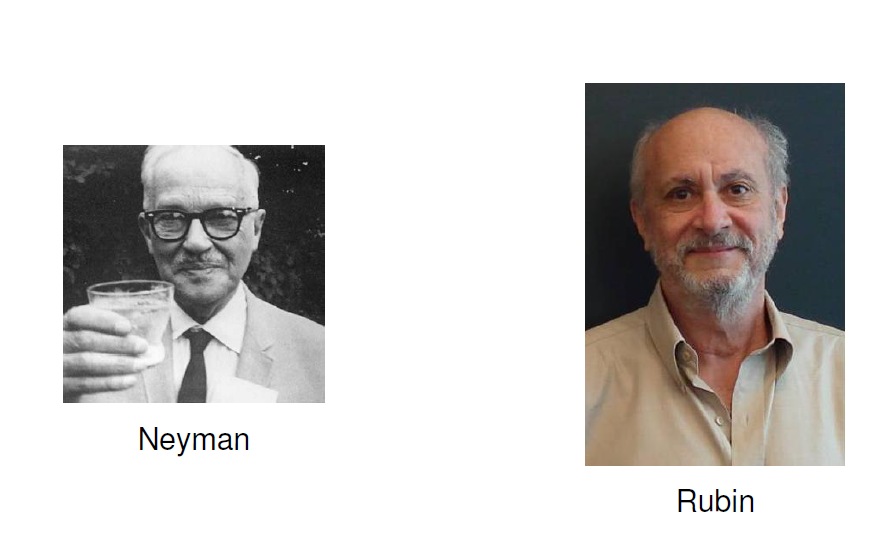

In [ ]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'neyman_rubin.PNG'))

### Framework #1: Potential Outcomes Framework
<br>
<font size="+1">
    <ul>
        <li>This framework is credited with being founded by Neyman and Rubin: </li>
        <br>
        <br>
        $\rule{800pt}{5pt}$
        <br>
        <br>
        <li>Let $i$ correspond to the <font color="red"><b style="color:red">unit or subject</b></font>.</li>
        <br>
        <li>The <font color="red"><b style="color:red">treatment or action</b></font> variable for a binary action is defined as \begin{equation}T_i = \mathbb{1}_{\{\text{unit i receives treatment}\}} = \begin{cases} 1 & \text{ if unit i received the treatment}, \\
        0 & \text{ otherwise}\end{cases}\end{equation}</li>
        <br>
        <li>The <font color="red"><b style="color:red">outcome variable</b></font> of interest for unit $i$ is $Y_i$.</li>
        <br>
        <ul>
            <li>The action occurs temporally before the outcome.</li>
            <br>
        </ul>
        <li>The <font color="red"><b style="color:red">potential outcome variable</b></font> of interest for unit \begin{equation}i\end{equation} is \begin{equation}Y_i(T) = \begin{cases} Y_i(1),  & \text{ if } T_i = 1 \text{ (potential outcome for unit i with treatment)} \\
Y_i(0), & \text{ if } T_i = 0 \text{ (potential outcome for unit i without treatment)}\\ \end{cases}\end{equation}</li>
        <br>
        <ul>
            <li>The potential outcome of a subject that remains unobserved is called the <font color="red"><b style="color:red">counterfactual outcome</b></font>.</li>
            <br>
        </ul>
        <li>Using this framework, we can write the observed outcomes as $$Y_i = T_i \ Y_i(1) + (1-T_i) \ Y_i(0)$$ which implies that a unit's potential outcome doesn't depend on another unit's treatment; i.e. your treatment has no effect on my potential outcome.</li>
        <br>
        <ul>
            <li><i>Does this seem like something we can write as a regression?</i></li>
            <br>
            <li><i>Maybe something like $$Y_i = \alpha + \tau T_i + \varepsilon_i ?$$</i></li>
            <br>
            <li><i>Does this make sense? How can we interpret this?</i> </li>
            <br>
        </ul>
        <br>
        <br>
        $\rule{800pt}{5pt}$
        <br>
        <br>
    </ul>
</font>

$\rule{800pt}{10pt}$

$\square$

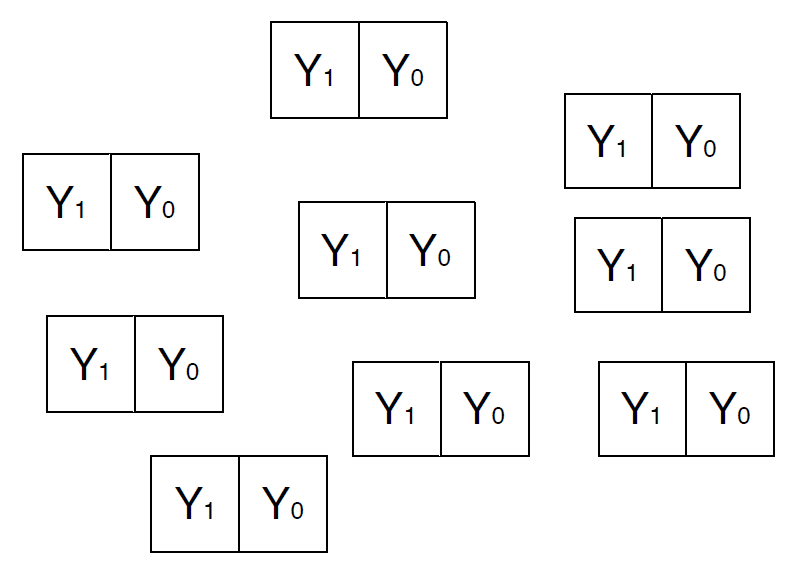

In [ ]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'neyman_urn_model_1.PNG'))

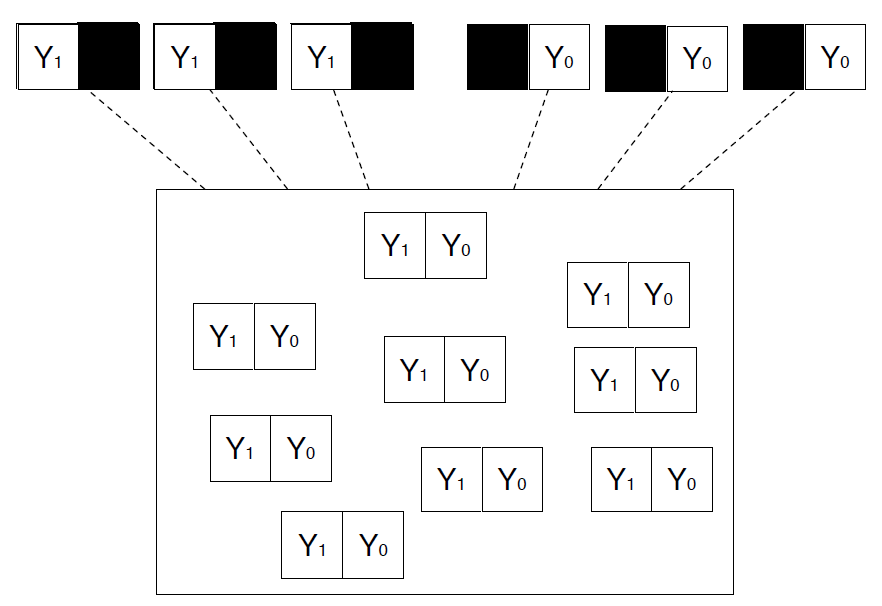

In [ ]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'neyman_urn_model_2.PNG'))

<br>
<font size="+1">
    <ul>
        $\rule{800pt}{5pt}$
        <br>
        <br>
        <li>The <font color="red"><b style="color:red">individual causal effect</b></font> of the treatment / intervention / action on the outcome for unit \begin{equation}i\end{equation} is the difference between its potential outcomes: \begin{equation}\tau_i = Y_i(1) - Y_i(0)\end{equation}</li>
        <br>
        <li>The <font color="red"><b style="color:red">fundamental problem of causal inference</b></font> is that we <b>cannot</b> observe both potential outcomes for each unit $i$.</li>
        <br>
        <ul>
            <li>So how can we calculate $\tau_i = Y_i(1) - Y_i(0)$?</li>
            <br>
        </ul>
        <br>
        <br>
        $\rule{800pt}{5pt}$
        <br>
        <br>
        <li>For another introduction to the potential outcomes framework, see <a href="https://www.causalconversations.com/post/po-introduction/#observed-outcomes">here</a>.</li>
        <br>
    </ul>
</font>

$\rule{800pt}{10pt}$

$\square$

### Causal Inference as a Missing Data Problem
<br>
<font size="+1">
    <ul>
        <li>Let's consider our simplififed problem of estimating the change in taxi rides while Uber was deciding to operate or not in a region.</li>
        <br>
        <li>Let's first assume we could simultaneously observe a location's taxi rides when Uber is operating and not operating in that location.</li>
        <br>
        <li><table>
  <tr>
      <th>$i$ - location</th>
      <th>$T_i$ - Uber's operating status</th>
      <th>$Y_i(1)$ - taxi rides when Uber is operating</th>
      <th>$Y_i(0)$ - taxi rides when Uber is not operating</th>
      <th>$\tau_i$ - effect of Uber on taxi rides</th>
  </tr>
  <tr>
      <td>1</td>
      <td>1</td>
      <td>10</td>
      <td>4</td>
      <td>6</td>
  </tr>
  <tr>
      <td>2</td>
      <td>1</td>
      <td>1</td>
      <td>2</td>
      <td>-1</td>
  </tr>
  <tr>
      <td>3</td>
      <td>0</td>
      <td>3</td>
      <td>3</td>
      <td>0</td>
  </tr>
  <tr>
      <td>4</td>
      <td>0</td>
      <td>5</td>
      <td>2</td>
      <td>3</td>
  </tr>
    </table></li>
        <br>
    <li>Ideally, when trying to uncover the effects of an intervention, we would like to learn the distribution of the individual treatment effects across subjects</li>
        <br>
        <li>Knowing the distribution of $\tau$ would allow us to answer questions such as the proportion of individuals with negative, zero, or positive treatment effects; the maximum and minimum effect in the group; the median effect; or the effect the largest proportion of subjects would experience (the mode of the effect)</li>
        <br>
        <li>Unfortunately, individual treatment effects are impossible to observe.</li>
        <br>
    <li>In reality, we would observe</li>
    <br>
    <li><table>
  <tr>
      <th>$i$ - location</th>
      <th>$T_i$ - Uber's operating status</th>
      <th>$Y_i(1)$ - taxi rides when Uber is operating</th>
      <th>$Y_i(0)$ - taxi rides when Uber is not operating</th>
      <th>$\tau_i$ - effect of Uber on taxi rides</th>
      <th>$Y_i$ - taxi rides</th>
  </tr>
  <tr>
      <td>1</td>
      <td>1</td>
      <td>10</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>10</td>
  </tr>
  <tr>
      <td>2</td>
      <td>1</td>
      <td>1</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>1</td>
  </tr>
  <tr>
      <td>3</td>
      <td>0</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>3</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>3</td>
  </tr>
  <tr>
      <td>4</td>
      <td>0</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>2</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>2</td>
  </tr>
    </table></li>
        <br>
    <li>Causal inference and estimating causal effects is difficult because it involves missing data.</li>
    <br>
    <li>How can we calculate the individual causal effect $\tau_i$?</li>
    <br>
        <ul>
            <li>If we could assume <i>homogeneity</i> across subjects (meaning that observations were constant across units), then we could fill in the missing values with other subjects values.</li>
            <br>
            <li>If we could assume <i>homogeneity</i> across time (meaning that observations were constant across time), then we could give both interventions to a subject over time and fill in the missing values with their outcome at a later point in time.</li>
            <br>
            <li>Unfortunately, this is never a good assumption as individual effects are heterogeneous, so we have to shift our focus.</li>
            <br>
        </ul>
    <li>This is the fundamental problem of causal inference.</li>
    <br>
    </ul>
</font>

$\rule{800pt}{10pt}$

$\square$

### Average Treatment Effect (ATE)
<br>
<font size="+1">
    <ul>
        <li>Unfortunately, the fact that individual treatment effects are impossible to observe means that the distribution of treatment effects is impossible to uncover.</li>
        <br>
        <ul>
            <li>Thus, we won't be able to uncover the
proportion of subjects positively affected by the intervention, the proportion negatively affected, the proportion not affected, and so on.</li>
            <br>
            <li>And we won’t be able to uncover statistics such as the median or mode of the distribution.</li>
            <br>
            <li>But all is not lost.</li>
            <br>
            <li>It turns out that we may be able to uncover the average of the distribution of the individual treatment effects, even if we can’t uncover the entire distribution or other statistics describing the distribution.</li>
            <br>
        </ul>
        <li>Because the individual treatment effect $\tau_i$ are unobservable, we need to shift how we think about measuring causal effects.</li>
        <br>
        <li>We shift our focus to the expected treatment effect $$\tau_{ATE} = \mathbb{E}[\tau_i] = \mathbb{E}[Y_i(1) - Y_i(0)] \approx \frac{1}{N} \sum_{i=1}^N Y_i(1) - \frac{1}{N}\sum_{i=1}^N Y_{i}(0),$$ which measures the difference between the average of all potential outcomes with a treatment and the average of all potential outcomes without a treatment.</li>
        <br>
        <li>What's the average treatment effect for taxis in NYC?</li>
        <br>
        <li><table>
  <tr>
      <th>$i$ - location</th>
      <th>$T_i$ - Uber's operating status</th>
      <th>$Y_i(1)$ - taxi rides when Uber is operating</th>
      <th>$Y_i(0)$ - taxi rides when Uber is not operating</th>
      <th>$\tau_i$ - effect of Uber on taxi rides</th>
  </tr>
  <tr>
      <td>1</td>
      <td>1</td>
      <td>10</td>
      <td>4</td>
      <td>6</td>
  </tr>
  <tr>
      <td>2</td>
      <td>1</td>
      <td>1</td>
      <td>2</td>
      <td>-1</td>
  </tr>
  <tr>
      <td>3</td>
      <td>0</td>
      <td>3</td>
      <td>3</td>
      <td>0</td>
  </tr>
  <tr>
      <td>4</td>
      <td>0</td>
      <td>5</td>
      <td>2</td>
      <td>3</td>
  </tr>
    </table></li>
        <br>
        <li>$\mathbb{E}[\tau_i] = \frac{6 + (-1) + 0 + 3}{4} = 2 \implies$ the average effect is positive, but individual effects are negative for some locations!</li>
        <br>
        <li>But remember, this isn't the data we have access to!</li>
        <br>
        <li>In reality, we would observe</li>
    <br>
    <li><table>
  <tr>
      <th>$i$ - location</th>
      <th>$T_i$ - Uber's operating status</th>
      <th>$Y_i(1)$ - taxi rides when Uber is operating</th>
      <th>$Y_i(0)$ - taxi rides when Uber is not operating</th>
      <th>$\tau_i$ - effect of Uber on taxi rides</th>
      <th>$Y_i$ - taxi rides</th>
  </tr>
  <tr>
      <td>1</td>
      <td>1</td>
      <td>10</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>10</td>
  </tr>
  <tr>
      <td>2</td>
      <td>1</td>
      <td>1</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>1</td>
  </tr>
  <tr>
      <td>3</td>
      <td>0</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>3</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>3</td>
  </tr>
  <tr>
      <td>4</td>
      <td>0</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>2</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>2</td>
  </tr>
    </table></li>
        <br>
        <li>In order to best estimate this value, we need to to use conditional expected values.</li>
        <br>
        <li>\begin{align} \tau_{ATE} \ = & \ \mathbb{E}[Y_i(1) - Y_i(0)] \\
        \underbrace{\approx}_{why?} & \ \underbrace{\mathbb{E}[Y_i | T = 1] - \mathbb{E}[Y_i | T = 0]}_{\text{observed difference in means}} \\
        \underbrace{\approx}_{why?} & \ \underbrace{\frac{1}{N_1}\sum_{i: T_i = 1} Y_i}_{\text{average over units that have treatment}} - \underbrace{\frac{1}{N_0} \sum_{i: T_i = 0} Y_i}_{\text{average over units that didn't have treatment}} \\
        =: & \widehat{ATE} \\ \end{align}</li>
        <br>
    </ul>
</font>

$\square$

$\rule{800pt}{10pt}$

### Conditional Expectation
<br>
<font size="+1">
    <ul>
        <li>Recall for discrete random variables $X$ and $Y$, the conditional expectation of $Y$ given the event $X=x$ is given by: $$\mathbb{E}[Y | X = x] = \sum_{i} y_i \ \mathbb{P}(Y=y_i | X = x) = \sum_{i} y_i \ f_{Y|X}(y_i | x) \underbrace{\approx}_{\text{ by LLN }} \frac{1}{n} \sum_i^n y_i | x_i$$</li>
        <br>
        <li><table>
  <tr>
      <th>$i$ - location</th>
      <th>$T_i$ - Uber's operating status</th>
      <th>$Y_i(1)$ - taxi rides when Uber is operating</th>
      <th>$Y_i(0)$ - taxi rides when Uber is not operating</th>
      <th>$\tau_i$ - effect of Uber on taxi rides</th>
      <th>$Y_i$ - taxi rides</th>
  </tr>
  <tr>
      <td>1</td>
      <td>1</td>
      <td>10</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>10</td>
  </tr>
  <tr>
      <td>2</td>
      <td>1</td>
      <td>1</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>1</td>
  </tr>
  <tr>
      <td>3</td>
      <td>0</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>3</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>3</td>
  </tr>
  <tr>
      <td>4</td>
      <td>0</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>2</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>2</td>
  </tr>
    </table></li>
        <br>
        <li>$\mathbb{E}[Y_i | T = 1] \approx \frac{10+1}{2} = 5.5 $</li>
        <br>
        <li>$\mathbb{E}[Y_i | T = 0] \approx \frac{3+2}{2} = 2.5 $</li>
        <br>
        <li>This implies $$\tau_{ATE} = \underbrace{2}_{\text{if we observed both potential outcomes}} \neq \underbrace{3}_{\text{using the missing data and our approximation}} = \mathbb{E}[Y_i | T = 1] - \mathbb{E}[Y_i | T = 0]$$</li>
        <br>
        <li><b>So why are they not equal?</b></li>
        <br>
        <ul style="color:red">
            <font color="red"><li>The <i>observed difference in means</i> is a naive comparison.</li>
            <br>
            <li>Comparisons between <b>observed</b> outcomes of treated and not treated units can often be misleading due to a BIAS.</li>
            <br>
            <li>Recall: $$Y_i = T_i \ Y_i(1) + (1-T_i) \ Y_i(0)$$</li>
            <br>
            <li>Then $$\mathbb{E}[Y_i | T = 1] = \mathbb{E}\left[\{T_i \ Y_i(1) + (1-T_i) \ Y_i(0)\} | T = 1\right] = \mathbb{E}[Y_i(1) | T=1].$$</li>
            <br>
            <li>And $$\mathbb{E}[Y_i | T = 0] = \mathbb{E}\left[\{T_i \ Y_i(1) + (1-T_i) \ Y_i(0)\} | T = 0\right] = \mathbb{E}[Y_i(0) | T=0].$$</li>
            <br>
            <li>This implies \begin{align}
              \underbrace{\mathbb{E}[Y_i | T = 1] - \mathbb{E}[Y_i | T = 0]}_{\text{observed difference in means}} = & \mathbb{E}[Y_i(1) | T=1] - \mathbb{E}[Y_i(0) | T=0] \\
              = & \mathbb{E}[Y_i(1) | T=1] - \mathbb{E}[Y_i(0) | T=0] + \underbrace{\mathbb{E}[Y_i(0) | T=1] - \mathbb{E}[Y_i(0) | T=1]}_{0}\\
              = & \underbrace{(\mathbb{E}[Y_i(1) - Y_i(0) | T=1])}_{\text{average treatment effect on the treated}} + \underbrace{(\mathbb{E}[Y_i(0) | T=1] - \mathbb{E}[Y_i(0) | T=0])}_{\text{term due to SELECTION BIAS}}\\
              \end{align}</li>
            <br>
            <li>Another way of saying this is <b>the observed difference in mean outcomes for the treated and the untreated equals the average treatment effect on treated plus selection bias.</b></li>
            <br>
            <li>The bias term is not zero if <b>selection into treatment</b> is associated with the potential outcome!</li>
            <br>
            <li>Consider: a user is going to get a discount if they are more likely to churn; a stock is going to trade if it is more likely to have a price movement, or <b>a location is more likely to have Uber operating in it if Uber thinks it can penetrate that location's ride-hailing market.</b> $\implies$ selection of a unit into treatment is associated with the potential outcome.</li>
            <br>
            <li>How can we eliminate the selection bias term?</li>
            <br>
            <li>Randomization of treated and untreated units $T_i$ removes the selection bias by making $$\mathbb{E}[Y_i(0) | T=1] = \mathbb{E}[Y_i(0) | T = 0],$$ (we will discuss this more in the next section).</li>
            <br>
        </ul>
    </ul>
</font>
$\rule{800pt}{10pt}$

$\square$

### Assignment Mechanism
<br>
<font size="+1">
    <ul>
        <li>Since missing potential outcomes are unobservable, we must make assumptions to fill them in, i.e. <b>estimate</b> missing potential outcomes.</li>
        <br>
        <li>In causal inference and experimentation, assumptions are typically made about the <b>assignment mechnaism</b>.</li>
        <br>
        <li>The <font color="red"><b style="color:red">assignment mechanism</b></font> is the procedure that determines which units are selected for treatment.</li>
        <br>
        <li>Some example assignment mechanisms include:</li>
        <br>
        <ul>
            <li>selection of intervention based on random assignment,</li>
            <br>
            <li>selection of intervention based on some observable variables,</li>
            <br>
            <li>or selection of intervention based on some unobservable variables,</li>
            <br>
            <font color="red"><li>how does Uber assign locations to operate in? $\implies$ not randomly, but based on a belief or forecast of the growth it can achieve in a location.</li></font>
            <br>
        </ul>
        <li>The assumption on the assignment mechanism typically turns out to be something stated in terms of the probability of intervention $\mathbb{P}(T_i = 1)$ or $\mathbb{P}(T_i = 1 | X_i = x)$.</li>
        <br>
        <li><table>
  <tr>
      <th>$i$ - location</th>
      <th>$\mathbb{P}(T_i = 1)$ - probability of assignment</th>
      <th>$T_i$ - Uber's operating status</th>
      <th>$Y_i(1)$ - taxi rides when Uber is operating</th>
      <th>$Y_i(0)$ - taxi rides when Uber is not operating</th>
      <th>$\tau_i$ - effect of Uber on taxi rides</th>
      <th>$Y_i$ - taxi rides</th>
  </tr>
  <tr>
      <td>1</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>1</td>
      <td>10</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>10</td>
  </tr>
  <tr>
      <td>2</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>1</td>
      <td>1</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>1</td>
  </tr>
  <tr>
      <td>3</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>0</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>3</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>3</td>
  </tr>
  <tr>
      <td>4</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>0</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>2</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>2</td>
  </tr>
    </table></li>
        <br>
    </ul>
</font>
$\rule{800pt}{10pt}$

$\square$

### Summing Up: Potential Outcomes Neyman-Rubin Causal Model
<br>
<font size="+1">
    <ul>
        <li>Useful for studying the “effects of causes,” less so for the “causes of effects.”</li>
        <br>
        <li>No assumption of homogeneity, allows for causal effects to vary unit by unit.</li>
        <br>
        <ul>
            <li>No single “causal effect,” thus the need to be precise about the target estimand.</li>
            <br>
        </ul>
        <li>Distinguishes between <i>observed</i> outcomes $(Y_i | T_i)$ and potential outcomes $(Y_i(0), Y_i(1))$.</li>
        <br>
        <li>Causal inference is a missing data problem: we typically make assumptions about the assignment mechanism to go from descriptive inference to causal inference.</li>
        <br>
        <li>The potential outcomes framework was developed for binary interventions. It can be extended to quantitative interventions, but it is difficult.</li>
        <br>
    </ul>
</font>

$\square$

$\rule{800pt}{20pt}$

## Explanatory Regressions for Causal Inference

### How To Uncover Causal Effects
<br>
<font size="+1">
    <ul>
        <li>At this point, we know how to frame the problem of causality, define causal effects, and visualize causal relations; we even have an estimator that allows us to approximate the causal effect (of course with a sampling bias).</li>
        <br>
        <li>But what if the average-based estimator is not enough?</li>
        <br>
        <ul>
            <li>For causal inference questions concerning costly interventions, such as those regarding the purchase of costly digital ads targeted at a particular demographic, <b>average treatment effects</b> are not a sufficiently useful measurement to inform the design of a marketing campaign that is optimized for revenue.</li>
            <br>
            <li>These decisions require a more granular estimation of how a particular treatment affects different sets of individuals, commonly referred to in causal inference as <font color="red"><b style="color:red">heterogeneous treatment effect estimation</b></font>.</li>
            <br>
            <li>If time allows, we will see a methodology based in machine learning techniques for heterogeneous treatment effect estimation (causal forests) provide many examples of practical causal inference tooling that is extremely valuable for effectively managing operating expenses.</li>
            <br>
        </ul>
        <li>What are other ways to estimate causal effects?</li>
        <br>
        <li>We will need the help of structural causal models, specifically, a linear regression framework.</li>
        <br>
    </ul>
</font>

$\square$

$\rule{800pt}{10pt}$

### Quantifying with Regressions: Explanatory Regressions for Causal Inference
<br>
<font size="+1">
    <ul>
        <li>Linear regressions are the workhorse for traditional methods of causal inference - both in the controlled experiments framework, and in the observational data and counfounding framework.</li>
        <br>
        <li>Consider the following expression of the observed outcomes:
        \begin{align} Y_i & =  T_i \ Y_i(1) + (1-T_i) \ Y_i(0) \\
                        & = \underbrace{\left[ Y_i(1) - Y_i(0) \right]}_{\text{individual treatment effect}} \ T_i + Y_i(0) \\
                        & =  \tau_i \ T_i + Y_i(0) \\
                        \end{align}</li>
        <br>
        <li>This equation allows us to interpret the average treatment effect as a regression of the observed outcome on the treatment / intervention / action: $$Y_i = \alpha + \tau T_i  + \varepsilon_i \ ,$$ where $\varepsilon_i$ is a random variable with an expected value of zero and a constant variance.</li>
        <br>
        <li>Recall: $$\tau_{ATE} = \mathbb{E}[Y_i(1) - Y_i(0)].$$</li>
        <br>
        <li>Then using the linear regression equation, we get: $$\tau_{ATE} \approx \underbrace{\mathbb{E}[Y_i | T_i = 1] - \mathbb{E}[Y_i | T_i = 0]}_{\text{observed difference in means}} = (\alpha + \tau) - (\alpha) = \underbrace{\tau}_{\text{regression coefficient}!}$$</li>
        <br>
        <li>If we use OLS to fit the linear regression model, then $$Y_i = \hat{\alpha} + \hat{\tau} T_i \ ,$$  where $T_i \in \{0, 1\}$ is the assignment in an experiment.</li>
        <br>
        <li>We know $\hat{\alpha} = \mathbb{E}[Y_i | T_i = 0] = $ the average outcome of the untreated units.</li>
        <br>
        <li>We know $\hat{\alpha} + \hat{\tau} = \mathbb{E}[Y_i | T_i = 1]$ the average outcome of the treated units.</li>
        <br>
        <li>And we know $\hat{\tau} = \underbrace{\mathbb{E}[Y_i | T_i = 1] - \mathbb{E}[Y_i | T_i = 0]}_{\text{observed difference in means}} \underbrace{\approx}_{\text{not equal due to selection bias}} \tau_{ATE}$. </li>
        <br>
        <li>This gives us a working way to estimate the average treatment effect: simply regress the observed outcomes on the associated treatment, and then interpret the estimated coefficient as the treatment effect!</li>
        <br>
        <li>But what do we do when we have additional variables that we can exploit in our analysis?</li>
        <br>
    </ul>
</font>

$\square$

### Confounding - Absense of RCTs
<br>
<font size="+1">
    <ul>
        <li>If you can conduct a perfect randomized controlled experiment (RCT), then estimating the average causal effect, while complicated, will give you trustworthy results to make your decision.</li>
        <br>
        <ul>
            <li><b>But what if we have additional covariates that are impacting the treatment assignment or the observed outcome?</b></li>
            <br>
        </ul>
        <li>Depending on the type of experiment, that is, how subjects were assigned a treatment, it's possible that the estimated average treatment effect is contaminated by a <b>selection bias</b>.</li>
        <br>
        <li>We need to understand why certain subjects were selected or not for a particular intervention or action.</li>
        <br>
        <ul>
            <li>What characteristics do different units / subjects have?</li>
            <br>
            <li>What makes different units similar or different? </li>
            <br>
            <li>How are the characteristics or a subject or group of subjects related to the action?</li>
            <br>
            <li>How can we codify or measure characteristics for a unit?</li>
            <br>
        </ul>
        <li><font color="red"><b style="color:red">We can model the characteristics of a unit $i$ as a list (vector) of random variables $\vec{X}_i$ called covariates, which must be observed <i>before the action is assigned</i>.</b></font></li>
        <br>
        <li>If we consider the structural causal model approach to causal effect estimation and stick with using linear regressions, then we gain two benefits:</li>
        <br>
        <ul>
            <li>we can control for observed covariates (confounders) which typically helps improve the quality of the estimate of $\hat{\tau}$ by either <b>reducing the variance</b> (in the case of an RCT) or <b>reducing the bias</b> in $\hat{\tau}$ (if experiment wasn't quite an RCT),</li>
            <br>
            <ul>
                <li>$$Y_i = \alpha + \tau \ T_i + \beta_X \ X_i + \varepsilon_i$$</li>
                <br>
                <li>which implies $$\mathbb{E}[Y_i(1)] \approx \mathbb{E}[Y_i | T_i = 1] = \hat{\alpha} + \hat{\tau} + \hat{\beta}_X \ X_i$$</li>
                <br>
                <li>and $$\mathbb{E}[Y_i(0)] \approx \mathbb{E}[Y_i | T_i = 0] = \hat{\alpha} + \hat{\beta}_X \ X_i$$</li>
                <br>
            </ul>
            <li>we can control for interactions of the observed covariates and the interventions to see how the causal effect varies among units with different covariate vectors - this allows for the case that the causal effect itself varies depending on the observed covariates,</li>
            <br>
            <ul>
                <li>$$Y_i = \alpha + \tau \ T_i + \beta_X \ X_i + \beta_{T X} \ T_i \ X_i + \varepsilon_i$$</li>
                <br>
                <li>which implies $$\mathbb{E}[Y_i(1)] \approx \mathbb{E}[Y_i | T_i = 1] = \hat{\alpha} + \hat{\tau} + \left(\hat{\beta}_X + \hat{\beta}_{T X}\right) \ X_i $$</li>
                <br>
                <li>and $$\mathbb{E}[Y_i(0)] \approx \mathbb{E}[Y_i | T_i = 0] = \hat{\alpha} + \hat{\beta}_X \ X_i$$</li>
                <br>
                <font color="red"><li style="color:red">thus the estimated causal effect is $$\tau_{ATE} \approx \underbrace{\mathbb{E}[Y_i | T_i = 1] - \mathbb{E}[Y_i | T_i = 0]}_{\text{observed difference in means}} = \hat{\tau} + \hat{\beta}_{T X} \ X_i .$$</li>
                <br>
                <li style="color:red">This allows us to measure the <b>heterogeneous treatment effect</b> across the population.</li></font>
                <br>
            </ul>
        </ul>
        <li>This allows us to define a new measurement, the <font color="red"><b style="color:red">conditional average treatement effect (CATE)</b></font> $$\tau_{CATE}(x) = \mathbb{E}[Y_i(1) - Y_i(0) \ | X_i = x].$$</li>
        <br>
        <li>This is nothing but a <i>per-subgroup average treatment effect</i>.</li>
        <br>
        <ul>
            <li>This is a very hot topic right now, and a lot of work on causal inference and machine learning has been dedicated to estimating the conditional average treatement effect.</li>
            <br>
            <li>See <a href="https://www.markhw.com/blog/causalforestintro">here</a> and <a href="https://www.youtube.com/watch?v=BH8U-BMPklw">here</a> for introductions, and <a href="https://davidrosenberg.github.io/ttml2021/causal-estimation/2.conditional-ave-treatment-effects.pdf">here</a> and <a href="https://arxiv.org/pdf/2104.09935.pdf">CATE meets ML</a> for more advanced ideas.</li>
            <br>
        </ul>
        <br>
$\rule{800pt}{5pt}$  
<br>
        <li>Of course, using the linear regression model as your structural causal model isn't without challenges.</li>
        <br>
        <li>Some problems with using regression as a causal inference estimation strategy are:</li>
        <br>
        <ul>
            <li>not including confounders in the regression, which leads to the <a href="https://en.wikipedia.org/wiki/Omitted-variable_bias">ommitted variable bias</a>,</li>
            <br>
            <li>having a misspecified functional form, i.e. if the relation between the confounding variables and the outcome variable is not linear,</li>
            <br>
            <li>different units having different treatment effects,</li>
            <br>
            <li>having treatments assigned to different units for different reasons.</li>
            <br>
        </ul>
        <br>
$\rule{800pt}{5pt}$  
<br>
        <li>Other useful techniques for estimating average treatment effects in the absense of RCTs and in the presence of confounder variables include <b>matching</b> and <b>stratification methods</b>.</li>
        <br>
$\rule{800pt}{5pt}$  
<br>
        <li>If you don't observe the latent confounders or if you have too many confounders, then you can't add all the confounders to your regression well and you also can't stratify well.</li>
        <br>
        <ul>
            <li>This leads to the modern techniques of <a href="https://causalml-book.org/"><i>Causal ML</i></a>.</li>
            <br>
        </ul>
    </ul>
</font>

$\square$

# <b>How</b> Would Uber Estimate the Elasticity of NYC Cab Demand with Respect to the Number of Uber Rides?

- Let's start with the potential outcomes framework, and then formalize the causal effect using regressions.
<br>

- Our data triplet $(X, T, Y)$ represents $(\underbrace{\text{confounders}}_{\text{such as rainfall}}, \text{Uber rides}, \text{Taxi rides})$
<br>

- These variables all depend on / vary with $(i, t) = (\text{LocationID}, \text{Time})$, that is: $$(X_{i,t}, T_{i,t}, Y_{i,t}).$$
<br>

---
---
<br>

- $$\underbrace{Y_{i,t}}_{\text{number}\\ \text{of} \\ \text{taxi} \\ \text{rides}} = \underbrace{\tau^{ATE}}_{\text{elasticity;}\\ \text{avg} \\ \text{treatment} \\ \text{effect}} \ \underbrace{T_{i,t}}_{\text{number}\\ \text{of} \\ \text{Uber} \\ \text{rides}} + \overbrace{\underbrace{\tau_i^{spatial}}_{\text{(fixed)} \\ \text{effects}\\ \text{coming} \\ \text{from} \\ \text{different} \\ \text{locations}} + \underbrace{\tau_t^{temporal}}_{\text{(fixed)} \\ \text{effects}\\ \text{coming} \\ \text{from} \\ \text{different} \\ \text{time}} + \underbrace{\beta X_{i,t}}_{\text{effects}\\ \text{coming} \\ \text{from} \\ \text{different} \\ \text{confounders}}}^{\text{controlling for confounders}} + \underbrace{\varepsilon_{i,t}}_{\text{noise}}$$
<br>

---
---


- More succinctly our panel regression takes the form: $$Y_{i,t} = \tau T_{i,t} + \tau_i + \tau_t + \beta X_{i,t} + \varepsilon_{i,t}$$
<br>

---
---

- Remember, the quantity we're trying to estimate is the average treatment effect $$\tau^{ATE}.$$
<br>

---
---

- For more on using regressions as an empiricist, see <a href="https://canvas.northwestern.edu/files/1812461/download?download_frd=1&verifier=crYsnJtKSENNCg0X7KfUbIAlOaYCLSaZpqOSIfel">Practical Regression: Convincing Empirical Research in Ten Steps</a> and <a href="">Regressions: An Economist Obsession</a>.

---
---

In [ ]:
## FOR SIMPLICITY, WE WILL NOT ACCOUNT FOR SPATIAL OR TEMPORAL FIXED EFFECTS, though we could with some work by:
### restructuring the data, and
### using pd.get_dummies(drop_first=True)

In [ ]:
import statsmodels.api as sm

In [ ]:
## Not controlling for confounders

In [ ]:
reg = sm.OLS(daily_num_rides_rainfall_June_2015['Num_Yellow_Cab_Rides'],
             sm.add_constant(daily_num_rides_rainfall_June_2015['Num_Uber_Rides']))

results = reg.fit()

print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Num_Yellow_Cab_Rides   R-squared:                       0.319
Model:                              OLS   Adj. R-squared:                  0.319
Method:                   Least Squares   F-statistic:                     1934.
Date:                  Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                          10:59:02   Log-Likelihood:                -35119.
No. Observations:                  4130   AIC:                         7.024e+04
Df Residuals:                      4128   BIC:                         7.026e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -93.196

In [ ]:
reg = sm.OLS(daily_num_rides_rainfall_June_2015['Num_Green_Cab_Rides'],
             sm.add_constant(daily_num_rides_rainfall_June_2015['Num_Uber_Rides']))

results = reg.fit()

print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     Num_Green_Cab_Rides   R-squared:                       0.364
Model:                             OLS   Adj. R-squared:                  0.364
Method:                  Least Squares   F-statistic:                     2359.
Date:                 Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                         10:59:02   Log-Likelihood:                -31614.
No. Observations:                 4130   AIC:                         6.323e+04
Df Residuals:                     4128   BIC:                         6.325e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            116.0612      9.3

In [ ]:
reg = sm.OLS(daily_num_rides_rainfall_June_2015[['Num_Yellow_Cab_Rides', 'Num_Green_Cab_Rides']].sum(axis=1) ,
             sm.add_constant(daily_num_rides_rainfall_June_2015['Num_Uber_Rides']))

results = reg.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     4565.
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:59:02   Log-Likelihood:                -34945.
No. Observations:                4130   AIC:                         6.989e+04
Df Residuals:                    4128   BIC:                         6.991e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             22.8646     20.892      1.

## Endogeneity

---
---

- A variable is **endogenous** in a model if it is at least partly a function of other parameters or variables in a model.

---
---

- In plain English, **endogeneity** means you got the causation wrong.

- The model you wrote down and estimated does not properly capture the way causation works in the real world.

- When you write:
$$
Y_i = \beta_0 + \beta_1 X_i + \varepsilon_i,
$$ you can think of this equation in a number of ways.

  - You could think of it as a convenient way of predicting $Y$ based on $X$'s values.
  
  - You could think of it as a convenient way of modeling $\mathbb{E}[Y|X]$.
  
  - In either of these cases, there is no such thing as endogeneity, and you don't need to worry about it.
  <br>

- However, you can also think of the equation as embodying causation.

- You can think of $\beta_1$ as the answer to the question: <i>"What would happen to $Y$ if I reached into this system and experimentally increased $X$ by 1?"</i>
<br>

- If you want to think about it that way, using OLS to estimate it amounts to assuming that:

  1. $X$ causes $Y$  
  
  2. $\varepsilon$ causes $Y$  
  
  3. $\varepsilon$ does not cause $X$  
  
  4. $Y$ does not cause $X$  
  
  5. Nothing which causes $\varepsilon$ also causes $X$
  <br>


- <b>Failure of any one of $3-5$ will generally result in $\mathbb{E}[\varepsilon|X] \neq 0$, or, not quite equivalently, $\text{Cov}(X, \varepsilon) \neq 0$.</b>
<br>

- **Instrumental variables** is a way of correcting for the fact that you got the causation wrong (by making another, different, causal assumption).

  - A perfectly conducted randomized controlled trial is a way of forcing $3-5$ to be true.
  
  - If you pick $X$ randomly, then it sure isn't caused by $Y$, $\varepsilon$, or anything else.
  
  - So-called "natural experiment" methods are attempts to find special circumstances out in the world where $3-5$ are true even when we don't think $3-5$ are usually true.

    - If you wanted to calculate the wage value of education, you need a causal interpretation of $\beta_1$, but there are good reasons to believe that $3$ or $5$ is false.

    - It is very typical in courses on the linear model for the instructor to use the causal interpretation of $\beta_1$ while pretending not to be introducing causation, pretending that <i>"it's all just statistics."</i>

    - In fact, it is part of a larger phenomenon in the social sciences.
    
    - It is almost always the case that we are trying to determine the causal effect of $X$ on $Y$ — that's what science is about, after all.
    
    - On the other hand, it is also almost always the case that there is some story you can tell leading to a conclusion that one of $3-5$ is false.
    
    - So, there is a kind of practiced, fluid, equivocating dishonesty in which we swat away objections by saying that we're just doing associational work and then sneak the causal interpretation back elsewhere (normally in the introduction and conclusion sections of a paper).

    - For more, read <a href="https://projecteuclid.org/journals/statistics-surveys/volume-3/issue-none/Causal-inference-in-statistics-An-overview/10.1214/09-SS057.full">**Judea Pearl**</a>.

---
---

$\square$

## Conditioning

### From Latent Variables to Measured Variables
<br>
<font size="+1">
    <ul>
        <li>When estimating $\tau_{ATE}$ and working with observational data, because of selection bias, it is essential to <font color="red"><i style="color:red">condition</i></font> on all sources of variation of the treatment / intervention / action $T$, specifically confounder variables $X$.</li>
        <br>
        <li>It is good practice to initially view confounders as <font color="red"><b style="color:red">latent variables</b></font>, which are quantities that exist but aren't necessarily observable in the data.</li>
        <br>
        <ul>
            <li>The result of this type of thinking could be a causal map representing a structural causal model that encodes assumptions about relationships between latent variables that influence the assignment mechanism in $T$ or the observed outcome $Y$.</li>
            <br>
        </ul>
        <li>Of course, to condition on confounder variables $X$, we have to measure $X$ from the given data, or find a way to extract or proxy any latent confounder variables.</li>
        <br>
        <ul>
            <li>Unfortunately, most data sets rarely contain the confounder variables that we need to condition on.</li>
            <br>
            <li>This is also a point where machine learning techniques (even as simple as PCA) can be used to extract latent variables from the data.</li>
            <br>
        </ul>
        <br>
$\rule{800pt}{10pt}$  
<br>
        <font color="red"><li style="color:red"><b>In the event that we have to omit some potentially important confounders from the variables we condition on, this will lead to a bias in the causal effect estimator $\hat{\tau}$, caused by <a href="https://en.wikipedia.org/wiki/Omitted-variable_bias">omitting a variable</a>.</b></li></font>
        <br>
        <ul>
            <li>Failing to condition on confounders will make the association we measure of $T$ and $Y$ from our data different from the actual effect of $T$ on $Y$.</li>
            <br>
            <li>The <a href="https://towardsdatascience.com/omitted-variable-bias-and-what-can-we-do-about-it-344ac1477699">omitted variable bias</a> is a fact from linear regression theory (you can read more about <a href="https://statisticsbyjim.com/regression/confounding-variables-bias/">here</a>).</li>
            <br>
        </ul>
        <li>Unfortunately, that is not all!</li>
        <br>
$\rule{800pt}{10pt}$  
<br>
        <font color="red"><li style="color:red"><b>Even when latent variables have observable proxy variables in the data, those observed variables tend to be incomplete or imperfect measures of the true variables.</b></li>
        <br>
        <li style="color:red"><b>This is known as the <a href="https://en.wikipedia.org/wiki/Errors-in-variables_models">error-in-variables or noisy variables bias</a> and it also can commonly cause biased estimates in $\hat{\tau}$ the causal effect estimator.</b></li></font>
        <br>
    </ul>
</font>

$\square$

$\rule{800pt}{20pt}$

## Controlling For Rainfall

- We hypothesize that rainfall will impact Uber's ability to pickup riders and it will also impact the rides given by taxis.

- Including this variable in the regression should help reduce the problem of endogeneity.

In [ ]:
## Controlling for precipitation, need to check it is a proper confounder and significantly impacts Uber rides and taxi rides

In [ ]:
reg = sm.OLS(daily_num_rides_rainfall_June_2015['Num_Yellow_Cab_Rides'],
             sm.add_constant(daily_num_rides_rainfall_June_2015[['Num_Uber_Rides', 'precipitation']]))

results = reg.fit()

print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Num_Yellow_Cab_Rides   R-squared:                       0.337
Model:                              OLS   Adj. R-squared:                  0.337
Method:                   Least Squares   F-statistic:                     1049.
Date:                  Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                          10:59:02   Log-Likelihood:                -35064.
No. Observations:                  4130   AIC:                         7.013e+04
Df Residuals:                      4127   BIC:                         7.015e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            104.544

In [ ]:
reg = sm.OLS(daily_num_rides_rainfall_June_2015['Num_Green_Cab_Rides'],
             sm.add_constant(daily_num_rides_rainfall_June_2015[['Num_Uber_Rides', 'precipitation']]))

results = reg.fit()

print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     Num_Green_Cab_Rides   R-squared:                       0.490
Model:                             OLS   Adj. R-squared:                  0.489
Method:                  Least Squares   F-statistic:                     1980.
Date:                 Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                         10:59:02   Log-Likelihood:                -31159.
No. Observations:                 4130   AIC:                         6.232e+04
Df Residuals:                     4127   BIC:                         6.234e+04
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -115.5103     11.0

In [ ]:
reg = sm.OLS(daily_num_rides_rainfall_June_2015[['Num_Yellow_Cab_Rides', 'Num_Green_Cab_Rides']].sum(axis=1) ,
             sm.add_constant(daily_num_rides_rainfall_June_2015[['Num_Uber_Rides', 'precipitation']]))

results = reg.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     2285.
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:59:02   Log-Likelihood:                -34943.
No. Observations:                4130   AIC:                         6.989e+04
Df Residuals:                    4127   BIC:                         6.991e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -10.9654     27.661     -0.

In [ ]:
## What else can we control for?
## Is time fixed effects or spatial fixed effects the same as adding dummy variables?

In [ ]:
## Look across hours as well

## Displaying Results

- It is important to be able to display results of a regression in a readable table, and visualize those results using graphs.

In [ ]:
! pip install stargazer

In [ ]:
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

reg1 = sm.OLS(num_rides_rainfall_June_2015['Num_Yellow_Cab_Rides'],
             sm.add_constant(num_rides_rainfall_June_2015[['Num_Uber_Rides']])).fit()

reg1_confounder = sm.OLS(num_rides_rainfall_June_2015['Num_Yellow_Cab_Rides'],
                         sm.add_constant(num_rides_rainfall_June_2015[['Num_Uber_Rides', 'precipitation']])).fit()

reg2 = sm.OLS(num_rides_rainfall_June_2015['Num_Green_Cab_Rides'],
             sm.add_constant(num_rides_rainfall_June_2015[['Num_Uber_Rides']])).fit()

reg2_confounder = sm.OLS(num_rides_rainfall_June_2015['Num_Green_Cab_Rides'],
                         sm.add_constant(num_rides_rainfall_June_2015[['Num_Uber_Rides', 'precipitation']])).fit()

In [ ]:
## This is how you would convince someone technical that can understand regression causal analysis
stargazer = Stargazer([reg1, reg1_confounder, reg2, reg2_confounder])

stargazer.covariate_order(["const", "Num_Uber_Rides", "precipitation"])
stargazer.rename_covariates({"const": "Constant", 'Num_Uber_Rides': 'Num Uber Rides', 'precipitation': 'Precipitation'})
stargazer.custom_columns(["Num Yellow Cab Rides", "Num Yellow Cab Rides", "Num Green Cab Rides", "Num Green Cab Rides"], [1, 1, 1, 1])

stargazer.show_model_numbers(False)

HTML(stargazer.render_html())

In [ ]:
## To convince someone non-technical, you need graphs and pictures (and you might have to remove outliers to make it more convincing)

Text(0, 0.5, 'Number of Yellow Cab Rides')

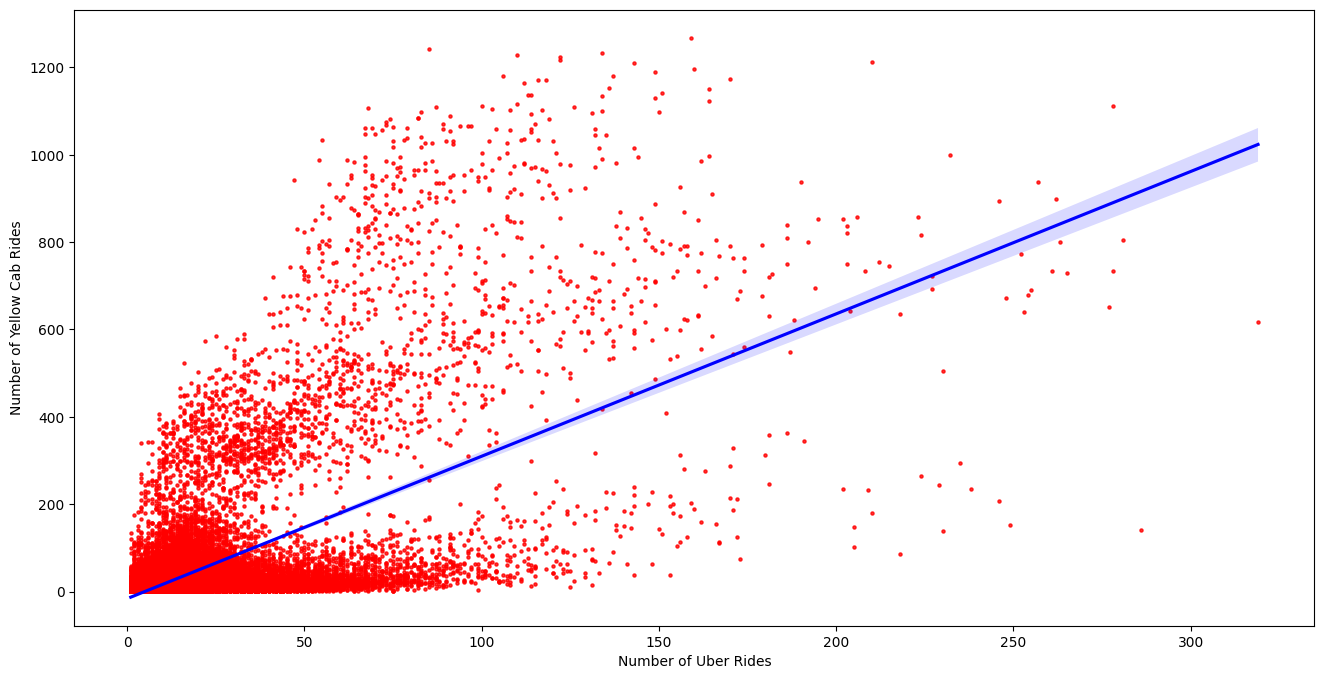

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot and regression line

plt.figure(figsize=(16,8))

sns.regplot(x='Num_Uber_Rides', y='Num_Yellow_Cab_Rides',
            data=num_rides_rainfall_June_2015,
            scatter_kws={'color': 'r', 's':5},
            line_kws={'color': 'blue'})

plt.xlabel("Number of Uber Rides")
plt.ylabel("Number of Yellow Cab Rides")

Text(0, 0.5, 'Number of Yellow Cab Rides')

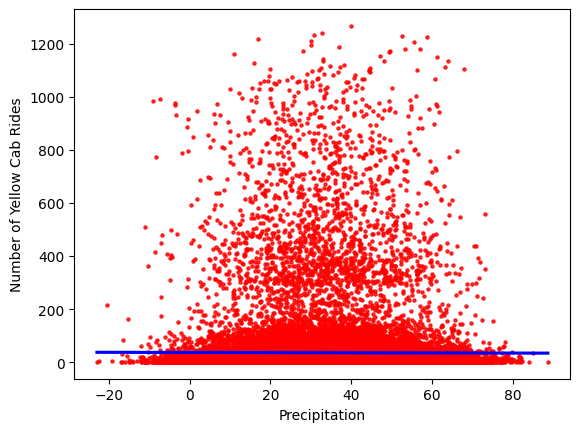

In [ ]:
sns.regplot(x='precipitation', y='Num_Yellow_Cab_Rides',
            data=num_rides_rainfall_June_2015,
            scatter_kws={'color': 'r', 's':5},
            line_kws={'color': 'blue'})

plt.xlabel("Precipitation")
plt.ylabel("Number of Yellow Cab Rides")

Text(0, 0.5, 'Number of Uber Rides')

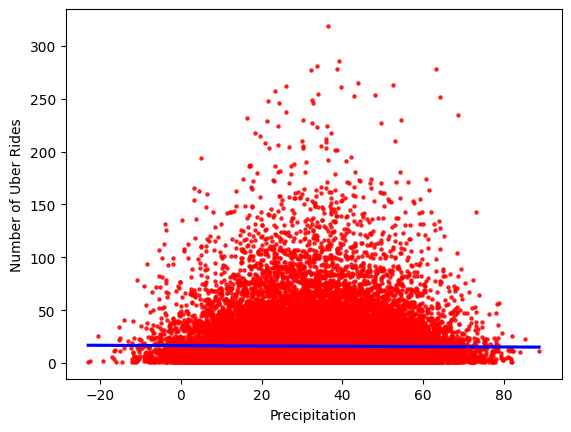

In [ ]:
sns.regplot(x='precipitation', y='Num_Uber_Rides',
            data=num_rides_rainfall_June_2015,
            scatter_kws={'color': 'r', 's':5},
            line_kws={'color': 'blue'})

plt.xlabel("Precipitation")
plt.ylabel("Number of Uber Rides")

In [ ]:
# # Regression line only
# plt.figure(figsize=(16,8))

# sns.regplot(x='Num_Uber_Rides', y='Num_Yellow_Cab_Rides',
#             data=num_rides_rainfall_June_2015,
#             scatter=False,
#             line_kws={'color': 'blue'})

# plt.xlabel("Number of Uber Rides")
# plt.ylabel("Number of Yellow Cab Rides")

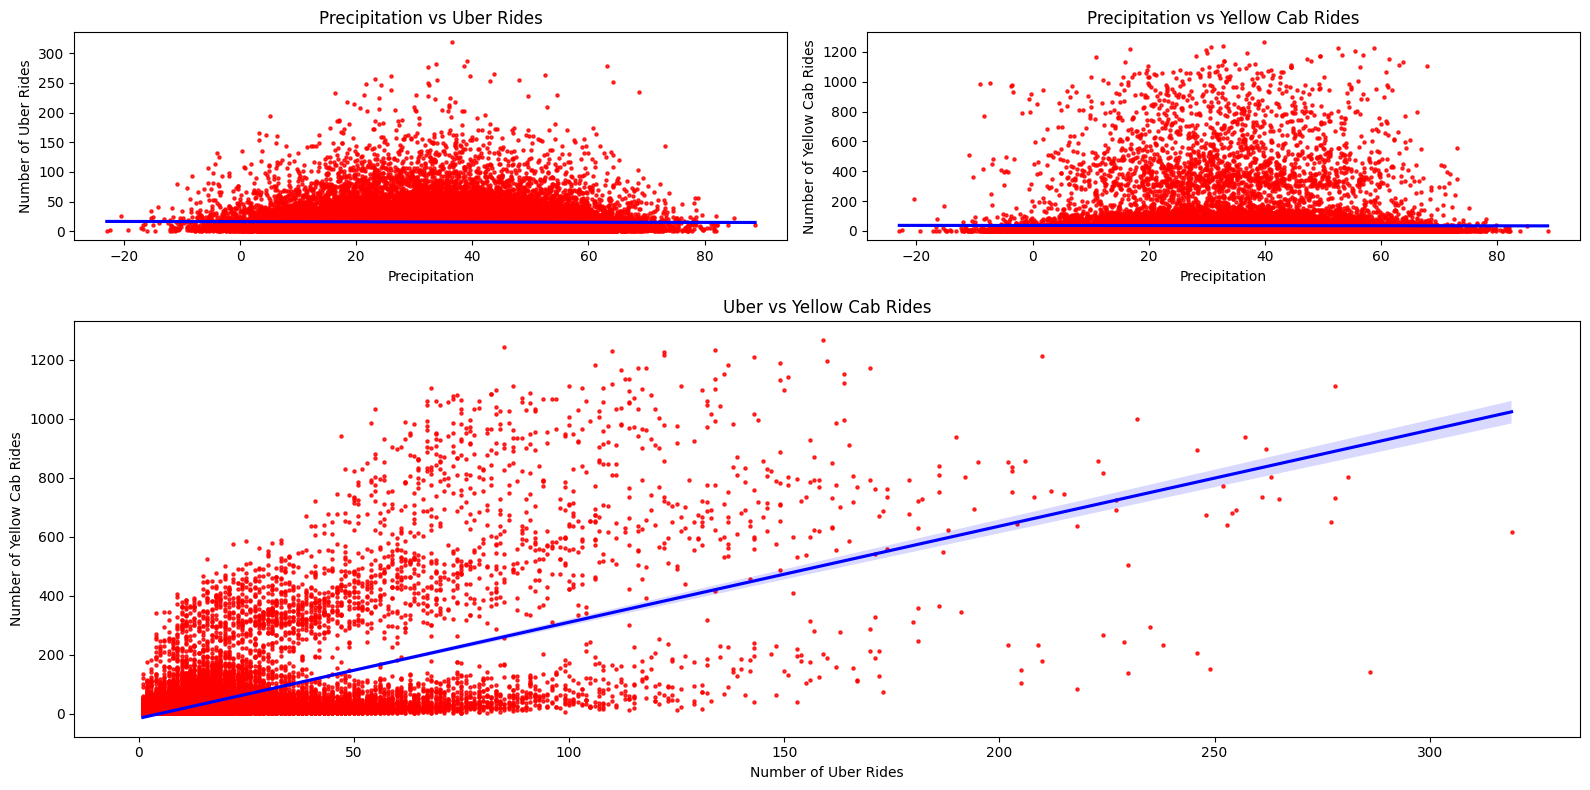

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure with a gridspec layout
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 2])  # 2 rows, 2 columns

# Top row, left plot (formerly the third plot)
ax1 = fig.add_subplot(gs[0, 0])
sns.regplot(x='precipitation', y='Num_Uber_Rides',
            data=num_rides_rainfall_June_2015,
            scatter_kws={'color': 'r', 's': 5},
            line_kws={'color': 'blue'},
            ax=ax1)
ax1.set_xlabel("Precipitation")
ax1.set_ylabel("Number of Uber Rides")
ax1.set_title("Precipitation vs Uber Rides")

# Top row, right plot
ax2 = fig.add_subplot(gs[0, 1])
sns.regplot(x='precipitation', y='Num_Yellow_Cab_Rides',
            data=num_rides_rainfall_June_2015,
            scatter_kws={'color': 'r', 's': 5},
            line_kws={'color': 'blue'},
            ax=ax2)
ax2.set_xlabel("Precipitation")
ax2.set_ylabel("Number of Yellow Cab Rides")
ax2.set_title("Precipitation vs Yellow Cab Rides")

# Bottom row spanning both columns (formerly the first plot)
ax3 = fig.add_subplot(gs[1, :])  # Span the entire second row
sns.regplot(x='Num_Uber_Rides', y='Num_Yellow_Cab_Rides',
            data=num_rides_rainfall_June_2015,
            scatter_kws={'color': 'r', 's': 5},
            line_kws={'color': 'blue'},
            ax=ax3)
ax3.set_xlabel("Number of Uber Rides")
ax3.set_ylabel("Number of Yellow Cab Rides")
ax3.set_title("Uber vs Yellow Cab Rides")

# Adjust layout
plt.tight_layout()
plt.show()


$\rule{800pt}{20pt}$

# Interpreting Our Findings

- It appears the Uber and NYC Taxis are complementary rather than supplementary!

  - This is, somewhat, unintuitive.

  - It indicates Uber should form a strategy to collaborate (i.e. cooperate) with NYC Taxis rather than compete with them for market share.

  - <a href="https://online.hbs.edu/blog/post/complements-vs-substitutes">Complements vs. Substitutes: What's the Difference?</a>

---
---

- Uber has partnered with taxi companies in New York City to allow riders to order a yellow taxi through the Uber app.

- Uber may also automatically dispatch a taxi to an UberX customer if a cab is closer than an Uber car.

  - Customers can still choose to reject the taxi and request an Uber instead.

---
---

- <a href="https://www.reddit.com/r/nyc/comments/tm4gvp/uber_reaches_deal_to_list_all_new_york_city_taxis/?rdt=46390">From a NYC Reddit Post</a>

- Uber is becoming friends with a former foe.

- The company has reached an agreement to list all New York City taxis on its app, an alliance that could ease the ride-hailing giant's driver shortage and temper high fares while directing more business to cabdrivers, whose livelihoods were affected by the pandemic.

- While Uber has formed partnerships with some taxi operators overseas, and riders in several U.S. cities can use its app to book taxis if cabdrivers choose to be listed there, the New York City alliance is its first citywide partnership in the U.S. New York, one of Uber's most lucrative markets, has been a battlefield for the company and the city's iconic yellow taxis for years.

- “It’s bigger and bolder than anything we’ve done,” said Andrew Macdonald, Uber’s global mobility chief. The company expects to launch the offering to riders later this spring.

- As part of the deal, the New York City Taxi and Limousine Commission’s licensed technology partners will integrate their taxi-hailing apps’ software with Uber’s.

  - Those apps—run by Creative Mobile Technologies and Curb Mobility—are used by the city’s roughly 14,000 taxis, according to Uber.
  
  - The two companies enable credit-card payments in taxis and also run the screens that display the weather, news and ads to riders.

- Passengers will pay roughly the same fare for taxi rides as for Uber X rides, according to the company. Uber drivers in New York City receive a minimum time and distance rate set by the TLC. Uber said its drivers typically earn more than that rate. Cabdrivers who agree to take Uber passengers will be paid the same way.

- The yellow-cab metered rate is based on a different calculus, meaning taxi drivers can make less, the same or more on an Uber ride depending on the nature of the trip.

  - Unlike Uber drivers in New York, taxi drivers will see expected earnings before a trip and will be able to decline rides they don’t think are worth their while, Uber said.

- Uber and its taxi partners will receive a cut of the fare. The companies declined to specify the terms. Uber’s average global take rate for rides in the fourth quarter was 20%.

- For Uber, the alliance marks a departure.

  - Having once vowed to disrupt the U.S. taxi industry, it is now betting that traditional taxis will fuel its next wave of growth.
  
  - By 2025, Uber wants to list every taxi in the world on its app.
  
  - “It's certainly ambitious,” said Mr. Macdonald, but “I certainly think it's possible.”"

---
---

- <a href="https://nupoliticalreview.org/2022/08/18/ubers-yellow-cab-deal-the-bittersweet-redemption-of-a-new-york-staple/">Uber’s Yellow Cab Deal: The Bittersweet Redemption of a New York Staple</a>

- <a href="https://www.nytimes.com/2022/03/24/business/uber-new-york-taxis.html">Uber Partners With Yellow Taxi Companies in NYC</a>

- <a href="https://www.nbcnews.com/tech/tech-news/years-rivalry-uber-puts-nyc-taxi-cabs-app-rcna21428">After years of rivalry, Uber puts NYC taxi cabs on its app</a>

- <a href="https://www.nbcnewyork.com/news/local/you-can-now-order-an-nyc-taxi-on-the-uber-app/3858428/">You Can Now Order an NYC Taxi on the Uber App</a>

- <a href="https://www.cnbc.com/2023/07/15/new-york-city-taxis-fight-for-survival-against-uber-and-lyft.html">New York City taxis fight for survival against Uber and Lyft</a>'

---
---

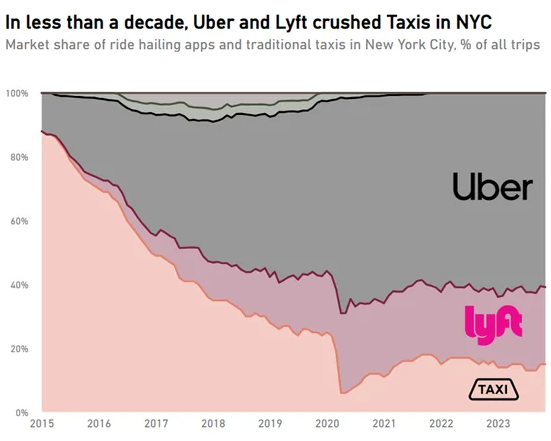

In [ ]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'uber_vs_taxi_demand.png'))

# What Have We Covered?
<br>
<font size="+1">
  <ol>
    <li>We first discussed the business of Uber through the lens of a platform that offers an optimal matching service.</li>
    <br>
    <li>We then looked at panel data representing Uber rides in NYC and extracted time-based features from the timestamp.</li>
    <br>
    <li>Next, we analyzed rider patterns across different time periods and found some notable trends.</li>
    <br>
    <li>Finally, we've learned about causal inference and the potential outcomes model.</li>
    <br>
    <li>Then we leveraged the potential outcomes framework in a regression setting to explain our data and establish causal relationships.</li>
    <br>
  </ol>
</font>

$\rule{800pt}{20pt}$

$\rule{800pt}{20pt}$

# Miscellaneous: NOT NECESSARY TO KNOW<br>



## Relation Between Regressions and Groupings

Regression and grouping are related in several ways, particularly when analyzing how different groups impact relationships between variables. Here are some key connections:

### 1. **Dummy Variables in Regression**
   - **Purpose**: To incorporate categorical groupings into a regression model.
   - **How**: Create dummy (binary) variables for each group. For instance, if you have a dataset with a "Region" variable (North, South, East), you can create dummy variables such as `Region_North`, `Region_South`, and `Region_East`.
   - **Interpretation**: Regression coefficients for these dummy variables show how belonging to a particular group affects the dependent variable compared to a reference group.

### 2. **Group-wise Regression**
   - **Purpose**: To understand how regression relationships vary between groups.
   - **How**: Perform separate regressions for each group. For example, run one regression for males and another for females.
   - **Interpretation**: This helps identify whether the effect of independent variables differs across groups.

### 3. **Interaction Terms**
   - **Purpose**: To examine if the relationship between an independent variable and the dependent variable changes across groups.
   - **How**: Include interaction terms between the group variable (dummy) and other predictors.
   - **Example**: If you have `Gender` (Male = 0, Female = 1) and `Experience` as predictors, an interaction term `Gender*Experience` can show if the effect of `Experience` on income differs between genders.
   
### 4. **Hierarchical or Multilevel Models**
   - **Purpose**: To analyze data with nested group structures (e.g., students within schools).
   - **How**: These models account for variability at both the group and individual levels, estimating separate group-level intercepts or slopes.
   - **Interpretation**: They help understand how groups impact overall relationships while controlling for within-group variations.

### 5. **Clustering and Regression**
   - **Purpose**: Clustering can be used to define groups based on similar patterns, and regression can then examine the relationships within or across these clusters.
   - **How**: After clustering observations, you can run regressions within each cluster to see how relationships hold in different groups.

---
---

- Grouping helps analyze how relationships between variables differ by category or subgroup. Regression models extend naturally to account for these group differences, providing insights into group-specific effects and overall patterns.

## <a href="https://matheusfacure.github.io/python-causality-handbook/14-Panel-Data-and-Fixed-Effects.html">Panel Data and Fixed Effects</a>

## Additional Resources If Interested
<br>
<font size="+1">
    <ul>
        <li><a href="https://www.uber.com/blog/simulated-marketplace/">Gaining Insights in a Simulated Marketplace with Machine Learning at Uber
</a></li>
        <br>
        <li><a href="https://eng.lyft.com/matchmaking-in-lyft-line-9c2635fe62c4">Matchmaking in Lyft Line</a></li>
        <br>
        <li><a href="https://blogs.cornell.edu/info2040/2019/10/23/uber-ride-sharing-a-matching-market/">Uber Ride-Sharing: A Matching Market?</a></li>
        <br>
        <li><a href="https://www.uber.com/us/en/marketplace/matching/">How Does Uber Match Riders With Drivers?</a></li>
        <br>
    </ul>
</font>

## Regression analysis using interaction terms

- Can we use <a href="https://numpy.org/doc/stable/reference/generated/numpy.kron.html">Kronecker product</a>

### **Interaction Terms**
   - **Purpose**: To examine if the relationship between an independent variable and the dependent variable changes across groups.
   - **How**: Include interaction terms between the group variable (dummy) and other predictors.
   - **Example**: If you have `Gender` (Male = 0, Female = 1) and `Experience` as predictors, an interaction term `Gender*Experience` can show if the effect of `Experience` on income differs between genders.

---

#### **Regression with Interaction Terms**

Focusing on understanding how variables interact to affect trip counts:

- **a. Data Preparation:**
  - Use features like `Hour`, `DayOfWeekNum`, `Month`, and create interaction terms (e.g., `Hour * DayOfWeekNum`).
  - Ensure all variables are appropriately encoded and scaled if necessary.

- **b. Modeling:**
  - Fit a multiple linear regression model that includes both main effects and interaction terms.
  - Assess the model for multicollinearity and address it if present.

- **c. Evaluation:**
  - Examine the significance of interaction terms by reviewing their coefficients and p-values.
  - Use model selection criteria (AIC, BIC) to evaluate the model's performance relative to models without interaction terms.

- **d. Interpretation:**
  - Interpret significant interaction effects to understand how the relationship between predictors and trip counts changes under different conditions.
  - Provide examples of how the impact of `Hour` on trip counts varies across different days of the week.

## Multinomial Regression to explain the centroids of a cluster

- we might change this to a regression involving the different impact of uber rides on yellow taxis, on green taxis, and on all taxi trips

  - might use interaction terms to investigate impact of uber rides at different times or in different locations

- need to control for other features, such as different time features and spatial features

Here are approximate latitude and longitude bounding boxes for the five boroughs of New York City:

1. **Manhattan**
   - Latitude: 40.6829° N to 40.8820° N
   - Longitude: -74.0479° W to -73.9067° W

2. **Brooklyn**
   - Latitude: 40.5700° N to 40.7394° N
   - Longitude: -74.0419° W to -73.8561° W

3. **Queens**
   - Latitude: 40.5417° N to 40.8007° N
   - Longitude: -73.9626° W to -73.7004° W

4. **The Bronx**
   - Latitude: 40.7850° N to 40.9176° N
   - Longitude: -73.9339° W to -73.7654° W

5. **Staten Island**
   - Latitude: 40.4961° N to 40.6480° N
   - Longitude: -74.2558° W to -74.0522° W



Here are the borough boundaries formatted as ranges for filtering a pandas DataFrame with `latitude` and `longitude` columns:

1. **Manhattan**
```python
manhattan = df[(df['latitude'] >= 40.6829) & (df['latitude'] <= 40.8820) &
               (df['longitude'] >= -74.0479) & (df['longitude'] <= -73.9067)]
```

2. **Brooklyn**
```python
brooklyn = df[(df['latitude'] >= 40.5700) & (df['latitude'] <= 40.7394) &
              (df['longitude'] >= -74.0419) & (df['longitude'] <= -73.8561)]
```

3. **Queens**
```python
queens = df[(df['latitude'] >= 40.5417) & (df['latitude'] <= 40.8007) &
            (df['longitude'] >= -73.9626) & (df['longitude'] <= -73.7004)]
```

4. **The Bronx**
```python
bronx = df[(df['latitude'] >= 40.7850) & (df['latitude'] <= 40.9176) &
           (df['longitude'] >= -73.9339) & (df['longitude'] <= -73.7654)]
```

5. **Staten Island**
```python
staten_island = df[(df['latitude'] >= 40.4961) & (df['latitude'] <= 40.6480) &
                   (df['longitude'] >= -74.2558) & (df['longitude'] <= -74.0522)]
```


Manhattan is divided into several distinct neighborhoods, each with its own unique character. Below are approximate latitude and longitude ranges for some of these neighborhoods:

| Neighborhood         | Latitude Range (°N) | Longitude Range (°W) |
|----------------------|---------------------|----------------------|
| **Upper East Side**  | 40.7640 to 40.7736  | 73.9560 to 73.9490   |
| **Upper West Side**  | 40.7750 to 40.8000  | 73.9900 to 73.9700   |
| **Harlem**           | 40.8000 to 40.8200  | 73.9500 to 73.9350   |
| **Midtown**          | 40.7500 to 40.7600  | 73.9900 to 73.9750   |
| **Chelsea**          | 40.7400 to 40.7500  | 74.0000 to 73.9900   |
| **Greenwich Village**| 40.7300 to 40.7400  | 74.0000 to 73.9900   |
| **Lower East Side**  | 40.7150 to 40.7250  | 73.9900 to 73.9750   |
| **Financial District**| 40.7000 to 40.7100 | 74.0150 to 74.0050   |

These coordinates are approximate and may overlap with adjacent neighborhoods due to the fluid nature of neighborhood boundaries in New York City. For more precise delineations, you can refer to the [NYC Department of City Planning's "City of Neighborhoods" map](https://www.nyc.gov/site/planning/data-maps/city-neighborhoods.page).

The latitude and longitude range for **below 110th Street** in Manhattan can be approximated as follows:

Latitude and Longitude Range for Below 110th Street:

- **Latitude**: 40.7000° N to 40.7999° N
- **Longitude**: -74.0200° W to -73.9340° W

You can use this range to filter data points below 110th Street in your pandas DataFrame:

```python
below_110th = df[(df['latitude'] >= 40.7000) & (df['latitude'] <= 40.7999) &
                 (df['longitude'] >= -74.0200) & (df['longitude'] <= -73.9340)]
```

## Explanatory Regression of Spatial (Cross-sectional) Features - EDA, Metrics, & Regressions

- as opposed to time-series features, that we've previously investigated

- how is this different than within cluster regressions, or controlling regressions for cluster membership?

---

- this should be about calculating a metric for Y and calculating some dummy (treatment) variables or control variables for the T's and X's and running a regression, interpreting the coefficients in terms of impact, t-stats, and p-values

---

- aggregate the data to calculate the total number of trips for each day throughout the sample

- plot the hourly trip counts over time to visually identify trends, seasonality, and any anomalies.

- encode categorical variables (e.g., `DayOfWeek`, `Base`) using one-hot encoding / dummy variables

- estimate a linear regression model to predict daily trip counts using the selected independent variables

- include both time-based and categorical variables in your model

- analyze the statistical significance of the treatment/explanatory variable by looking at p-values, both with an without the control variables

- interpret the model results, discussing the impact of time-related factors on trip demand

- interpret the coefficients of significant variables to understand their impact on trip counts

- discuss how variables like `Hour`, `DayOfWeekNum`, and `Base` influence demand

- suggest how Uber could use these insights for operational planning and marketing strategies


---

#### **Geospatial Regression Modeling**

Utilizing spatial features (`Lat`, `Lon`) along with time-based variables:

- **a. Data Preparation:**
  - Divide the New York City area into spatial units using a grid or clustering method.
  - Aggregate trip counts within each spatial unit for a specific time frame (e.g., hourly or daily).

- **b. Exploratory Spatial Data Analysis:**
  - Visualize the spatial distribution of trip counts using heatmaps or choropleth maps.
  - Calculate spatial autocorrelation metrics like Moran's I to assess the presence of spatial dependence.

- **c. Modeling:**
  - Fit a spatial regression model (e.g., Spatial Lag Model or Spatial Error Model) to account for spatial dependencies in trip counts.
  - Include time-based variables as independent variables in the model.

- **d. Evaluation and Interpretation:**
  - Interpret the spatial lag or error coefficients to understand the influence of neighboring areas on trip demand.
  - Identify high-demand regions and discuss any observed spatial patterns.
  - Explain how spatial factors combined with temporal variables can help optimize resource allocation.



In [ ]:
# regress daily total trips  (which is serially correlated (Austin needs to think how to account for this))
# on dummy variable for day of week (do we need to control for anything else, possibly lat/long, etc.)
## what is this representing? a day of week effect?

## we could try different Y variables like daily change in trips, or percentage change, etc.

## they need to interpret regression results using coefficients, t-stats, and p-valuess

In [ ]:
# Regression coefficients for these dummy variables show how belonging to a particular
# group affects the dependent variable compared to a reference group.

Regression and grouping are related in several ways, particularly when analyzing how different groups impact relationships between variables. Here are some key connections:

### 1. **Dummy Variables in Regression**
   - **Purpose**: To incorporate categorical groupings into a regression model.
   - **How**: Create dummy (binary) variables for each group. For instance, if you have a dataset with a "Region" variable (North, South, East), you can create dummy variables such as `Region_North`, `Region_South`, and `Region_East`.
   - **Interpretation**: Regression coefficients for these dummy variables show how belonging to a particular group affects the dependent variable compared to a reference group.

### 2. **Group-wise Regression**
   - **Purpose**: To understand how regression relationships vary between groups.
   - **How**: Perform separate regressions for each group. For example, run one regression for males and another for females.
   - **Interpretation**: This helps identify whether the effect of independent variables differs across groups.



### 3. **Clustering and Regression**
   - **Purpose**: Clustering can be used to define groups based on similar patterns, and regression can then examine the relationships within or across these clusters.
   - **How**: After clustering observations, you can run regressions within each cluster to see how relationships hold in different groups.

### Summary
Grouping helps analyze how relationships between variables differ by category or subgroup. Regression models extend naturally to account for these group differences, providing insights into group-specific effects and overall patterns.

$\rule{800pt}{20pt}$

## Comparative Analysis of Uber and Taxi Services in June 2014

- In this question, you will perform a comparative analysis of `Uber` and `Green Cab` services in New York City for the month of **June 2014**.
<br>

- By focusing on trips occurring within **Manhattan**, you will calculate and compare key metrics to evaluate the performance and usage patterns of these two transportation services.

### Data Preparation

- Load the Datasets
  - Begin by loading the datasets for **June 2014**, including `uber_June_2014` and `green_cab_June_2014`.
  
- Format Datetime Fields
  -  For both Uber and Green Cab datasets, convert the pickup datetime fields to proper `datetime` objects.

- Extract Relevant Features
  -  From the datetime fields, extract essential features such as the **date, day of the week, and hour of the day**.
  - These features will be used later to analyze trip patterns and distributions.

In [ ]:
uber_June_2014 = uber_2014_pickup_data[uber_2014_pickup_data['Month'] == 6]

NameError: name 'uber_2014_pickup_data' is not defined

In [ ]:
#Uber
uber_June_2014.head(1)

In [ ]:
uber_dtypes = pd.DataFrame(uber_June_2014.dtypes)

uber_dtypes.T

All good with Uber dataset

In [ ]:
# June 2014 Pickup data

# yellow_cab_June_2014 = pd.read_parquet(os.path.join(data_path,
#                                                       'NYC_TLC_Cab_Trip_Records',
#                                                       'yellow_tripdata_2014-06.parquet'))

green_cab_June_2014 = pd.read_parquet(os.path.join(data_path,
                                                   'NYC_TLC_Cab_Trip_Records',
                                                   'green_tripdata_2014-06.parquet'))



In [ ]:
#GreenCab
green_cab_June_2014.head(2)

In [ ]:
greencab_df = pd.DataFrame(green_cab_June_2014.dtypes)
greencab_df.T

In [ ]:
#temporal preprocessing greencab

green_cab_June_2014['Date'] = green_cab_June_2014['lpep_pickup_datetime'].dt.date
green_cab_June_2014['DayOfWeek'] = green_cab_June_2014['lpep_pickup_datetime'].dt.day_name()
green_cab_June_2014['Hour'] = green_cab_June_2014['lpep_pickup_datetime'].dt.hour

green_cab_June_2014.head(2)

In [ ]:
green_cab_June_2014.shape

when im trying to preprocess day_name() for yellow cabs it just crashes so i will move on without it for now

### Define Geographic Area Using Latitude and Longitude Filters


- Filter Uber data using latitude and longitude, and utilize the provided latitude and longitude ranges to filter Uber trips that occurred within Manhattan.

- Filter Green Cab Data Using `PULocationID`
  -  Since the Green Cab dataset does not include direct latitude and longitude coordinates, use the `PULocationID` to filter trips within Manhattan.
  - Refer to the provided **lookup table** that maps each `LocationID` to its corresponding borough.
  - By identifying trips with `PULocationID` values that fall within Manhattan’s LocationIDs, you can accurately isolate Green Cab trips in the desired area.

In [ ]:
manhattan_lat_min, manhattan_lat_max = 40.6829, 40.8820
manhattan_lon_min, manhattan_lon_max = -74.0479, -73.9067

def filter_manhattan(df, lat_col='Lat', lon_col='Lon'):
    return df[(df[lat_col] >= manhattan_lat_min) & (df[lat_col] <= manhattan_lat_max) &
              (df[lon_col] >= manhattan_lon_min) & (df[lon_col] <= manhattan_lon_max)].copy()

# For Uber data
uber_manhattan = filter_manhattan(uber_June_2014, 'Lat', 'Lon')

# For Green Cab data
# green_cab_June_2014.rename(columns={'Pickup_latitude': 'Lat', 'Pickup_longitude': 'Lon'}, inplace=True)
# green_manhattan = filter_manhattan(green_cab_June_2014, 'Lat', 'Lon')


during the analysis above i figured out that there's no lat or lon in the green_cab df so i had to find the lookup table, do the filtering there and then join it with the green_cap df based on the `PULocationID` i will do it below

In [ ]:
green_cab_June_2014['PULocationID']

In [ ]:
# getting the lookup df
path = '/content/drive/MyDrive/Fall 2024 /545_HW_and_FinalExam'
lookup_table = pd.read_csv(os.path.join(path, 'taxi_zone_lookup.csv'))
lookup_table

In [ ]:
cte = lookup_table[lookup_table['Borough'] == 'Manhattan']

lookup_table_Manhattan_Location_IDs = cte['LocationID'].unique()

len(lookup_table_Manhattan_Location_IDs)

In [ ]:
lookup_table_Manhattan_Location_IDs

In [ ]:
lookup_table['Borough'].count() ### 69 out of 264 Boroughs are in Manhettan???

In [ ]:
## Filter the main DF

green_manhattan_manhettan = green_cab_June_2014[green_cab_June_2014['PULocationID'].isin(lookup_table_Manhattan_Location_IDs)]

cte = green_manhattan_manhettan.PULocationID.unique()

cte.sort()
cte

### Calculate Key Metrics


- Calculate the total number of trips in **Manhattan** for each service (Uber and Green Cab). Here, we're aiming to provide a direct comparison of the volume of trips handled by each service within the borough.

- Calculate the average number of daily trips for both Uber and Green Cab services in Manhattan.

- Compare the total and average daily trip counts between Uber and Green Cab.     
  - Analyze which service has a higher presence and whether one service outperforms the other in terms of trip volume.

In [ ]:
#1
total_trips = pd.DataFrame({
    'Service':['Uber', 'Green Cab'],

    'Total Trips' : [len(uber_manhattan), len(green_manhattan_manhettan)]

})

total_trips

In [ ]:
#2
average_daily_trips_uber = uber_manhattan.groupby('Date')['VendorID'].size().mean()

average_daily_trips_green_cab = green_manhattan_manhettan.groupby('Date')['VendorID'].size().mean()

print(f'average daily Manhettan trips for passagers using Uber in June is:{round(average_daily_trips_uber, 2)}')
print(f'average daily Manhettan trips for passagers using Green Cab in June is:{round(average_daily_trips_green_cab, 2)}')

In [ ]:
average_daily_trips = pd.DataFrame({
    'Service' : ['Uber', 'Green Cab'],
    'Average Daily Trips' : [round(average_daily_trips_uber, 2), round(average_daily_trips_green_cab, 2)]

})

average_daily_trips

### Visualize Trip Counts

- Create a bar plot to visually compare the total number of trips for Uber and Green Cab services in Manhattan.
- Then, create a bar plot to compare the average number of daily trips between Uber and Green Cab.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(data=total_trips, x='Service', y='Total Trips', palette='viridis')
plt.title('Total Trips in Manhattan - June 2014')
plt.ylabel('Total Trips')
plt.show()


plt.figure(figsize=(8, 6))
sns.barplot(data=average_daily_trips, x='Service', y='Average Daily Trips', palette='viridis')
plt.title('Average Daily Trips in Manhattan - June 2014')
plt.ylabel('Average Daily Trips')
plt.show()

### Analyze Trip Distribution by Day of the Week

- For both Uber and Green Cab services in Manhattan, calculate the total number of trips for each day of the week.
  - The goal is to reveals patterns in trip demand across **different days**.
  
- Create line plots to compare trip counts over the days of the week for Uber and Green Cab.

In [ ]:
def trips_per_day_of_week(df, service_name):
    trips = df.groupby('DayOfWeek').apply(len).reset_index(name='TripCount')
    trips['Service'] = service_name
    return trips

uber_dow = trips_per_day_of_week(uber_manhattan, 'Uber')
green_dow = trips_per_day_of_week(green_manhattan_manhettan, 'Green Cab')

In [ ]:
dow_data = pd.concat([uber_dow, green_dow])

dow_data

In [ ]:
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_data['DayOfWeek'] = pd.Categorical(dow_data['DayOfWeek'], categories=dow_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.lineplot(data=dow_data, x='DayOfWeek', y='TripCount', hue='Service', marker='o')
plt.title('Trip Counts by Day of the Week in Manhattan - June 2014')
plt.ylabel('Trip Count')
plt.show()

## Causal Inference as a Missing Data Problem
<br>
<font size="+1">
    <ul>
        <li>Let's consider our simple (but very real) example where Google was testing different payment systems for one of their products.</li>
        <br>
        <li>Let's first assume we could simultaneously observe users' payment behaviours under different payment systems.</li>
        <br>
        <li><table>
  <tr>
      <th>$i$ - user</th>
      <th>$T_i$ - new payment system</th>
      <th>$Y_i(1)$ - revenue from users using new payment system</th>
      <th>$Y_i(0)$ - revenue from users using old payment systems</th>
      <th>$\tau_i$ - effect of payment systems</th>
  </tr>
  <tr>
      <td>1</td>
      <td>1</td>
      <td>10</td>
      <td>4</td>
      <td>6</td>
  </tr>
  <tr>
      <td>2</td>
      <td>1</td>
      <td>1</td>
      <td>2</td>
      <td>-1</td>
  </tr>
  <tr>
      <td>3</td>
      <td>0</td>
      <td>3</td>
      <td>3</td>
      <td>0</td>
  </tr>
  <tr>
      <td>4</td>
      <td>0</td>
      <td>5</td>
      <td>2</td>
      <td>3</td>
  </tr>
    </table></li>
        <br>
    <li>Ideally, when trying to uncover the effects of an intervention, we would like to learn the distribution of the individual treatment effects across subjects</li>
        <br>
        <li>Knowing the distribution of $\tau$ would allow us to answer questions such as the proportion of individuals with negative, zero, or positive treatment effects; the maximum and minimum effect in the group; the median effect; or the effect the largest proportion of subjects would experience (the mode of the effect)</li>
        <br>
        <li>Unfortunately, individual treatment effects are impossible to observe.</li>
        <br>
    <li>In reality, we would observe</li>
    <br>
    <li><table>
  <tr>
      <th>$i$ - user</th>
      <th>$T_i$ - new payment system</th>
      <th>$Y_i(1)$ - revenue from users using new payment system</th>
      <th>$Y_i(0)$ - revenue from users using old payment systems</th>
      <th>$\tau_i$ - effect of payment systems</th>
      <th>$Y_i$ - outcome</th>
  </tr>
  <tr>
      <td>1</td>
      <td>1</td>
      <td>10</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>10</td>
  </tr>
  <tr>
      <td>2</td>
      <td>1</td>
      <td>1</td>
      <td><b style="color:red">?</b></td>
      <td><b style="color:red">?</b></td>
      <td>1</td>
  </tr>
  <tr>
      <td>3</td>
      <td>0</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>3</td>
      <td><font color="red"><b style="color:red">?</b></font></td>
      <td>3</td>
  </tr>
  <tr>
      <td>4</td>
      <td>0</td>
      <td><b style="color:red">?</b></td>
      <td>2</td>
      <td><b style="color:red">?</b></td>
      <td>2</td>
  </tr>
    </table></li>
        <br>
    <li>Causal inference and estimating causal effects is difficult because it involves missing data.</li>
    <br>
    <li>How can we calculate the individual causal effect $\tau_i$?</li>
    <br>
        <ul>
            <li>If we could assume <i>homogeneity</i> across subjects (meaning that observations were constant across units), then we could fill in the missing values with other subjects values.</li>
            <br>
            <li>If we could assume <i>homogeneity</i> across time (meaning that observations were constant across time), then we could give both interventions to a subject over time and fill in the missing values with their outcome at a later point in time.</li>
            <br>
            <li>Unfortunately, this is never a good assumption as individual effects are heterogeneous, so we have to shift our focus.</li>
            <br>
        </ul>
    <li>This is the fundamental problem of causal inference.</li>
    <br>
    </ul>
</font>

$\rule{800pt}{10pt}$

$\square$